In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import norm
import mibian
import scipy.stats as si

In [22]:
# set plotting style
import seaborn as sns
sns.set_theme()

import matplotlib.pylab as pylab
params = {'legend.fontsize': 18,
          'figure.figsize': (10, 6),
         'axes.labelsize': 25,
         'axes.titlesize':25,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)
%matplotlib inline

# Q1-a-Euler discretization and Milstein discretization

In [3]:
# base parameters
S0 = 1
v0 = 0.2**2
kappa = 3
theta = 0.4**2
eta = 1.5
rho = -0.5

In [4]:
# simulation parameters
Nsims = 5_000

## Generate process of $v_t$ and $S_t$

In [5]:
def HeMC1 (S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    # time grid
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    # generate standard brownian motion for stock price process and variance process
    MU = np.array([0,0])
    COV = np.matrix([[1, rho],[rho,1]])
    e = np.random.multivariate_normal(MU,COV,size=(Nsims,t.shape[0]))
    e_S = e[:,:,0]
    e_v = e[:,:,1]
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    Xt = np.zeros((Nsims, NdT))
    Xt[:,0] = np.log(S0)
    
    correction = 0.25*eta**2*(e_v**2-1)*dt

    for i in range(len(t)-1):
        
        # Milstein discretization of vt
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*e_v[:,i] + correction[:,i]
        
        # Euler discretization of Xt
        Xt[:,i+1] = Xt[:,i] - 0.5*np.maximum(vt[:,i],0)*dt + np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*e_S[:,i]
        
    St = np.exp(Xt)
    
    return St, vt, t

T = 1/4 $S_t$ and $v_t$ processes

In [6]:
St1, vt1, t1 = HeMC1(S0,v0,rho,kappa,theta,eta,T=1/4,Nsims=5_000)

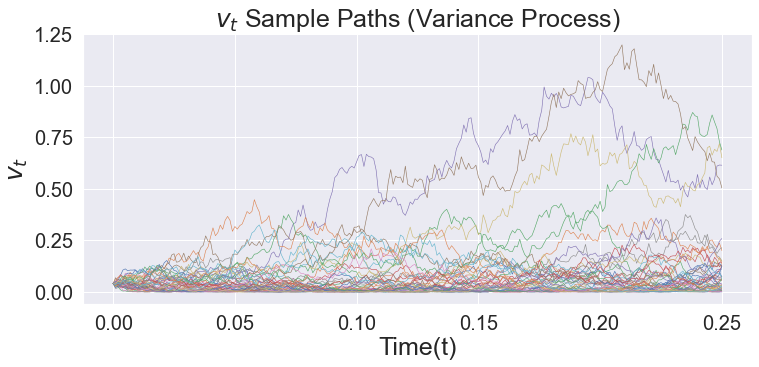

In [7]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t1,vt1[i,:],linewidth=0.6)
plt.title(r'$v_t$ Sample Paths (Variance Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$v_t$')
plt.show()

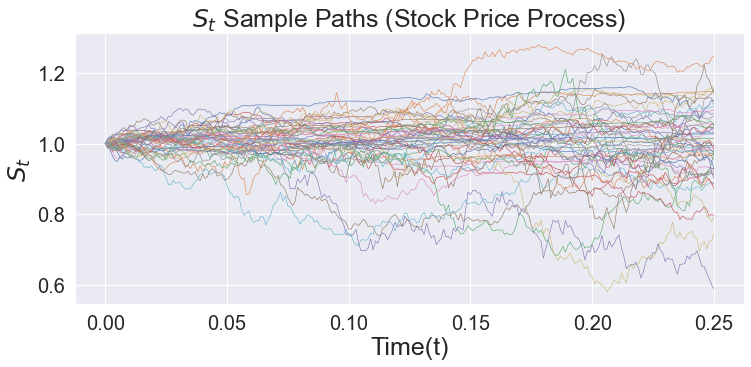

In [8]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t1,St1[i,:],linewidth=0.6)
plt.title(r'$S_t$ Sample Paths (Stock Price Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$S_t$')
plt.show()

T=1/2 $S_t$ and $v_t$ processes

In [9]:
St2, vt2, t2 = HeMC1(S0,v0,rho,kappa,theta,eta,T=1/2,Nsims=5_000)

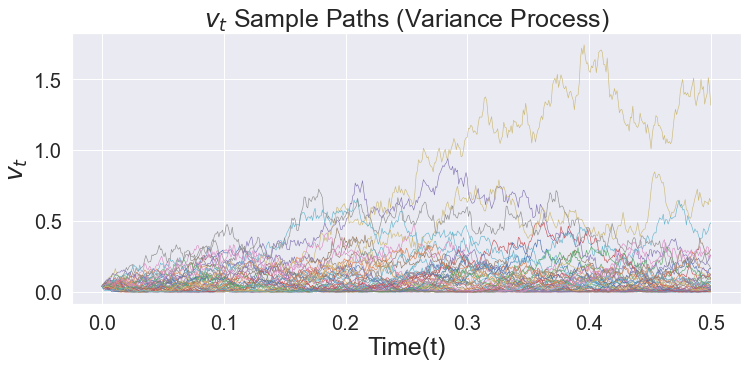

In [10]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t2,vt2[i,:],linewidth=0.6)
plt.title(r'$v_t$ Sample Paths (Variance Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$v_t$')
plt.show()

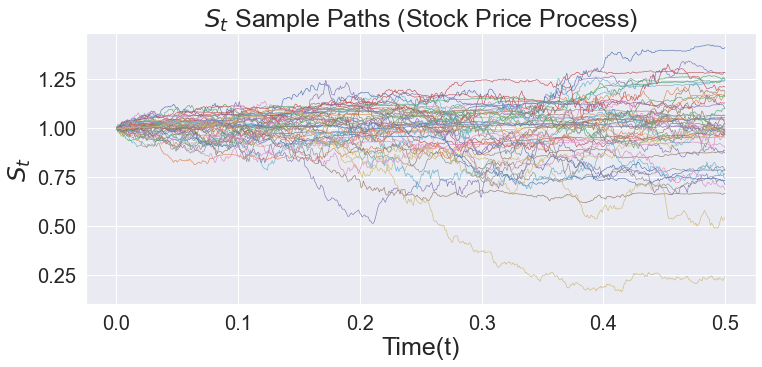

In [11]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t2,St2[i,:],linewidth=0.6)
plt.title(r'$S_t$ Sample Paths (Stock Price Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$S_t$')
plt.show()

T=1 $S_t$ and $v_t$ processes

In [12]:
St3, vt3, t3 = HeMC1(S0,v0,rho,kappa,theta,eta,T=1,Nsims=5_000)

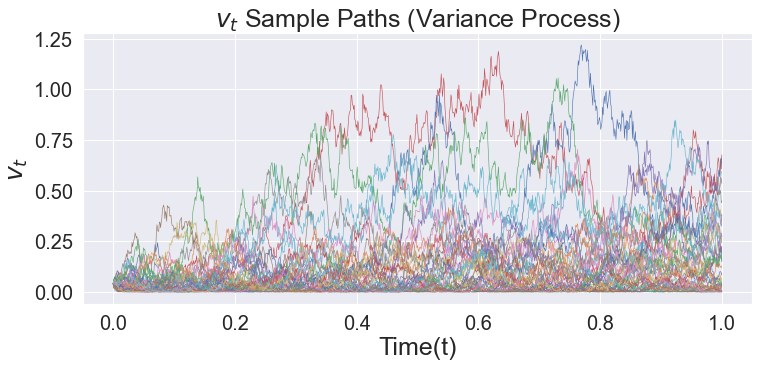

In [13]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t3,vt3[i,:],linewidth=0.6)
plt.title(r'$v_t$ Sample Paths (Variance Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$v_t$')
plt.show()

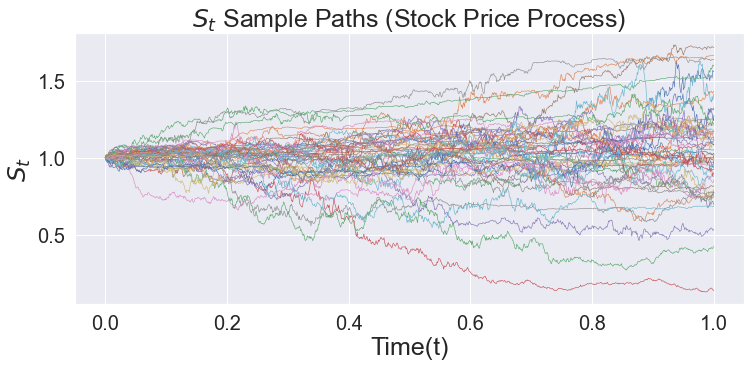

In [14]:
plt.figure(figsize=(12,5))
for i in range(0,50):
    plt.plot(t3,St3[i,:],linewidth=0.6)
plt.title(r'$S_t$ Sample Paths (Stock Price Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$S_t$')
plt.show()

## Market price of the option

In [15]:
def sim_option(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    St, vt, t = HeMC1(S0,v0,rho,kappa,theta,eta,T,Nsims)
    
    option_mkt_price = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            option_mkt_price[i] = np.mean(np.maximum((strikes[i]-St[:,-1]),0))
    
        elif strikes[i] >= S0:
            # call option
            option_mkt_price[i] = np.mean(np.maximum(St[:,-1]-strikes[i],0))
    
    return option_mkt_price

T = 1/4 Option Market Prices

In [16]:
option_mkt_price1 = sim_option(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)
option_mkt_price1

array([0.00743412, 0.01207877, 0.01933886, 0.03091807, 0.04798823,
       0.02526862, 0.01259275, 0.00646161, 0.00361929])

T = 1/2 Option Market Prices

In [17]:
option_mkt_price2 = sim_option(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)
option_mkt_price2

array([0.02108087, 0.02977493, 0.04140916, 0.05674405, 0.0769671 ,
       0.05262434, 0.03441591, 0.02189011, 0.01401397])

T = 1 Option Market Prices

In [18]:
option_mkt_price3 = sim_option(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)
option_mkt_price3

array([0.05028632, 0.06383205, 0.08020228, 0.09959103, 0.11889443,
       0.09490203, 0.0746763 , 0.05804571, 0.04498143])

## Implied Volatility with Different Maturities

* Method 1: Use the Mibian package to calculate the implied volatility directly

Example regarding how to use this package:
https://github.com/mayank-quant/options_and_python/blob/master/options_pricing_using_python.ipynb

Original package construction:
https://github.com/yassinemaaroufi/MibianLib/blob/master/mibian/__init__.py

1. Calculate the implied volatility with different maturities

In [19]:
# without confidence intervals
def IV_simulation1(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    St, vt, t = HeMC1(S0,v0,rho,kappa,theta,eta,T,Nsims)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            option_mkt_price[i] = np.mean(np.maximum((strikes[i]-St[:,-1]),0))
            
            # calculate put price implied volatility
            p = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price[i])
            implied_volatility[i] = p.impliedVolatility
    
        elif strikes[i] >= S0:
            # call option
            option_mkt_price[i] = np.mean(np.maximum(St[:,-1]-strikes[i],0))
            
            # calculate call price implied volatility
            c = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price[i])    
            implied_volatility[i] = c.impliedVolatility
    
    return option_mkt_price, strikes, implied_volatility

In [20]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_simulation1(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_simulation1(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)
option_mkt_price_year, strikes, implied_volatility_year = IV_simulation1(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter/100,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear/100,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year/100,label = r"$T=1$")
plt.title('Implied Volatility Smile - Euler and Milstein Discretization',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

* Method 2: Use Newton method and give the initial derivative estimate

https://aaronschlegel.me/implied-volatility-functions-python.html

https://www.codearmo.com/blog/implied-volatility-european-call-python

In [28]:
N_prime = norm.pdf
N = norm.cdf

def vega(S, K, T, r, sigma):
    
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    
    vega = S  * np.sqrt(T) * N_prime(d1)
    
    return vega

In [29]:
def black_scholes_call(S, K, T, r, sigma):

    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = S * N(d1) -  N(d2)* K * np.exp(-r * T)
    return call

In [30]:
def black_scholes_put(S, K, T, r, sigma):

    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    put =  N(-d2)* K * np.exp(-r * T) - S * N(-d1) 
    return put

In [31]:
def implied_volatility_call(C, S, K, T, r, tol=0.0001,max_iterations=100):
    
    sigma = 0.3
    
    for i in range(max_iterations):
        
        diff = black_scholes_call(S, K, T, r, sigma) - C
        
        if abs(diff) < tol:
            break
        
        sigma = sigma - diff / vega(S, K, T, r, sigma)
        
    return sigma

In [32]:
def implied_volatility_put(P, S, K, T, r, tol=0.0001,max_iterations=100):
    
    sigma = 0.3
    
    for i in range(max_iterations):
        
        diff = black_scholes_put(S, K, T, r, sigma) - P
        
        if abs(diff) < tol:
            break
        
        sigma = sigma - diff / vega(S, K, T, r, sigma)
        
    return sigma

In [33]:
# thire method is to use newton method without using the scipy pacakge and without confidence interval
def IV_simulation2(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    St, vt, t = HeMC1(S0,v0,rho,kappa,theta,eta,T,Nsims)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            option_mkt_price[i] = np.mean(np.maximum((strikes[i]-St[:,-1]),0))
            
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
    
        elif strikes[i] >= S0:
            # call option
            option_mkt_price[i] = np.mean(np.maximum(St[:,-1]-strikes[i],0))
    
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
    
    return option_mkt_price, strikes, implied_volatility

In [34]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_simulation2(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_simulation2(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)
option_mkt_price_year, strikes, implied_volatility_year = IV_simulation2(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

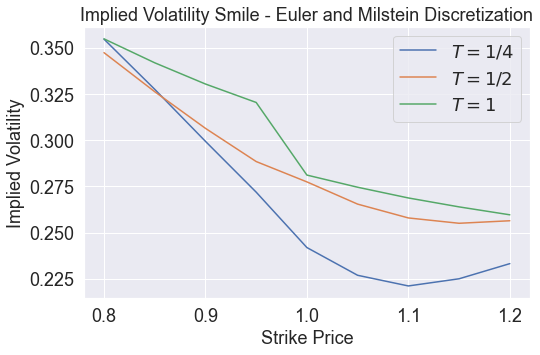

In [36]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile - Euler and Milstein Discretization',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

## Implied Volatility Confidence Intervals

Method 1: mibian package

In [30]:
# with confidence intervals
def IV_simulation1_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    St, vt, t = HeMC1(S0,v0,rho,kappa,theta,eta,T,Nsims)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            payoff = np.maximum((strikes[i]-St[:,-1]),0)
            
            option_mkt_price[i] = np.mean(payoff)
            option_mkt_price_lower[i] = np.mean(payoff) - 1.96*np.std(payoff)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(payoff) + 1.96*np.std(payoff)/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            p1 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price[i])
            implied_volatility[i] = p1.impliedVolatility
            p2 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price_lower[i])
            implied_volatility_lower[i] = p2.impliedVolatility
            p3 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price_upper[i])
            implied_volatility_upper[i] = p3.impliedVolatility

    
        elif strikes[i] >= S0:
            # call option
            payoff = np.maximum((St[:,-1]-strikes[i]),0)
            option_mkt_price[i] = np.mean(payoff)
            option_mkt_price_lower[i] = np.mean(payoff) - 1.96*np.std(payoff)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(payoff) + 1.96*np.std(payoff)/np.sqrt(Nsims)
            
            # calculate call price implied volatility
            c1 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price[i])
            implied_volatility[i] = c1.impliedVolatility
            c2 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price_lower[i])
            implied_volatility_lower[i] = c2.impliedVolatility
            c3 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price_upper[i])
            implied_volatility_upper[i] = c3.impliedVolatility

                
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [31]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation1_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) - Euler and Milstein Discretization')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [33]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation1_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) - Euler and Milstein Discretization')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [35]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation1_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) - Euler and Milstein Discretization')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

* Method 2: Newton Method

In [63]:
# with confidence intervals
def IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    St, vt, t = HeMC1(S0,v0,rho,kappa,theta,eta,T,Nsims)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            payoff = np.maximum((strikes[i]-St[:,-1]),0)
            
            option_mkt_price[i] = np.mean(payoff)
            option_mkt_price_lower[i] = np.mean(payoff) - 1.96*np.std(payoff)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(payoff) + 1.96*np.std(payoff)/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)

    
        elif strikes[i] >= S0:
            # call option
            payoff = np.maximum((St[:,-1]-strikes[i]),0)
            option_mkt_price[i] = np.mean(payoff)
            option_mkt_price_lower[i] = np.mean(payoff) - 1.96*np.std(payoff)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(payoff) + 1.96*np.std(payoff)/np.sqrt(Nsims)
            
            # calculate call price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
                
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [64]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

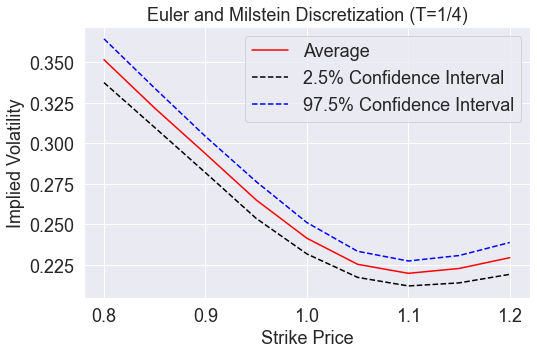

In [65]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Euler and Milstein Discretization (T=1/4)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [66]:
conf_width1=implied_volatility_upper-implied_volatility_lower
conf_width1

array([0.02700097, 0.02425082, 0.02237355, 0.02269453, 0.01934897,
       0.01607201, 0.01539937, 0.01686594, 0.01963423])

In [67]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

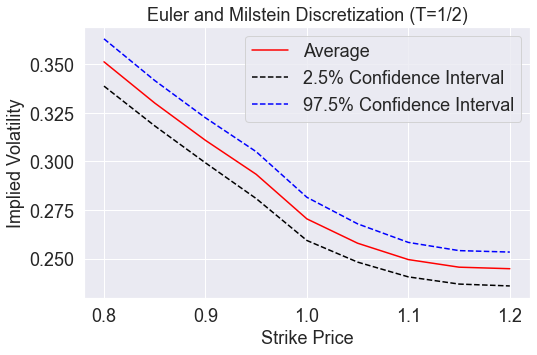

In [68]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Euler and Milstein Discretization (T=1/2)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [69]:
conf_width2=implied_volatility_upper-implied_volatility_lower
conf_width2

array([0.02434274, 0.02337108, 0.02319609, 0.0241447 , 0.02223927,
       0.01970912, 0.01776133, 0.01723239, 0.01745119])

In [70]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

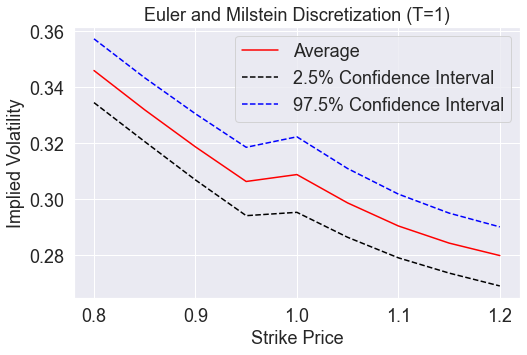

In [71]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Confidence Interval",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Confidence Interval",color="blue",linestyle="dashed")
plt.title('Euler and Milstein Discretization (T=1)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [72]:
conf_width3=implied_volatility_upper-implied_volatility_lower
conf_width3

array([0.02275935, 0.0227764 , 0.02360892, 0.02440379, 0.02695985,
       0.0245391 , 0.022744  , 0.0214143 , 0.02108053])

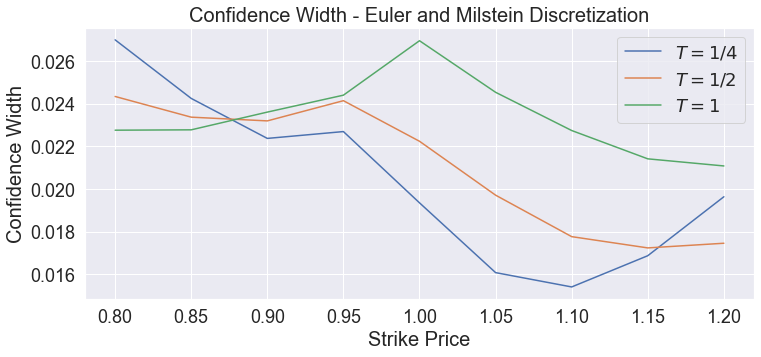

In [99]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width1,label = r"$T=1/4$")
plt.plot(strikes, conf_width2,label = r"$T=1/2$")
plt.plot(strikes, conf_width3,label = r"$T=1$")
plt.title('Confidence Width - Euler and Milstein Discretization',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

In [76]:
strikes

array([0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ])

# Q1-b-Mixing Method 

## Implied Volatility with Different Maturities

Use analytical solution to calculate the option price

In [46]:
def f_call(K, S, b ): 
    dp = (np.log(S/K) + 0.5*b**2)/b
    dm = (np.log(S/K) - 0.5*b**2)/b
    
    return S*norm.cdf(dp) - K*norm.cdf(dm)

def f_put(K, S, b ): 
    dp = (np.log(S/K) + 0.5*b**2)/b
    dm = (np.log(S/K) - 0.5*b**2)/b
    
    return K*norm.cdf(-dm) - S*norm.cdf(-dp)

Calculate the implied volatility, with market option price obtained from the analytical solution

In [47]:
# simulate sample paths of variance process
def sim_vt(v0, kappa, theta,eta,T,Nsims):
    
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
   
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*Z + 0.25*eta**2*(Z**2-1)*dt
    
    return vt, t

In [77]:
vt, t = sim_vt(v0, kappa, theta,eta,T=1,Nsims=5000)

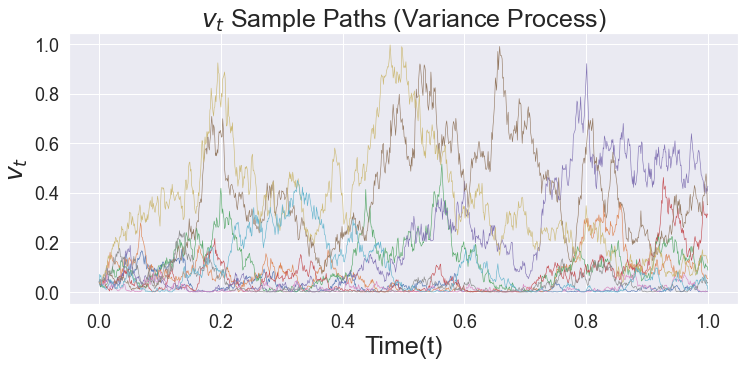

In [78]:
plt.figure(figsize=(12,5))
for i in range(0,10):
    plt.plot(t,vt[i,:],linewidth=0.6)
plt.title(r'$v_t$ Sample Paths (Variance Process)')
plt.xlabel('Time(t)')
plt.ylabel(r'$v_t$')
plt.show()

* Mibian method to calculate implied volatility using the Heston Model derived Black-Scholes Model

In [79]:
def MixS0(eta, kappa, theta, rho, Nsims,T):
    # time grid
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims,NdT))
    vt[:,0] = v0
    
    increment_vt = np.zeros((Nsims, NdT))
    
    increment_sqrtvt = np.zeros((Nsims,NdT))
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
        
        vt[:,i+1] = vt[:,i] + kappa*(theta-vt[:,i])*dt + eta*np.sqrt(vt[:,i]*dt)*Z+0.25*eta**2*(Z**2-1)*dt
        
        vt[:,i+1] = np.fmax(0,vt[:,i+1])
        
        increment_vt[:,i+1] = vt[:,i]*dt
        
        increment_sqrtvt[:,i+1] = np.sqrt(vt[:,i]) * sqrt_dt * Z
    
    integral_vt = np.sum(increment_vt, axis=1)
    integral_sqrtvt = np.sum(increment_sqrtvt, axis=1)
    
    # calculate a&b
    a = -0.5*integral_vt + rho*integral_sqrtvt
    b_squared = (1-rho**2)*integral_vt
    
    # new starting price for BS equation
    S0_star = S0*np.exp(a+0.5*b_squared)
    
    return S0_star, b_squared, a

In [80]:
S0_star, b_squared, a1 = MixS0(eta, kappa, theta, rho, Nsims=5000,T=1/4)

In [81]:
# without confidence intervals
# mibian method to calculate the implied volatility
def IV_mixing1(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)

    S0_star, b_squared,a = MixS0(eta, kappa, theta, rho, Nsims,T)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            # put option
            option_mkt_price[i] = np.mean(f_put(strikes[i],S0_star,np.sqrt(b_squared)))
            
            # calculate put price implied volatility
            p = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price[i])
            implied_volatility[i] = p.impliedVolatility
    
        elif strikes[i] >= S0:
            # call option
            option_mkt_price[i] = np.mean(f_call(strikes[i],S0_star,np.sqrt(b_squared)))
            
            # calculate call price implied volatility
            c = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price[i])    
            implied_volatility[i] = c.impliedVolatility
    
    return option_mkt_price, strikes, implied_volatility

In [82]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_mixing1(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_mixing1(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_mixing1(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

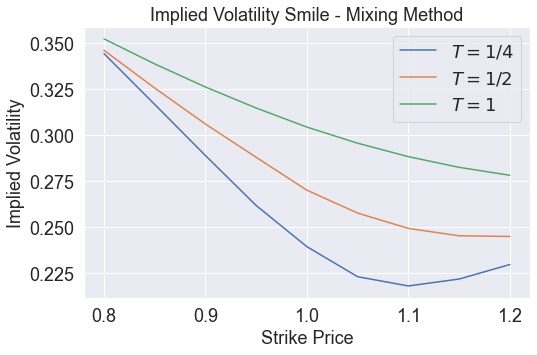

In [83]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter/100,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear/100,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year/100,label = r"$T=1$")
plt.title('Implied Volatility Smile - Mixing Method',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

## Implied Volatility with Confidence Interval

* Mibian Method to Calculate the Confidence Interval

Note: it seems Mibian package and Newton's method can be used interchangeably, but it appears the Mibian's IV curve is more smooth

In [53]:
# with confidence intervals
def IV_mixing1_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    # obtain the input for new BS equations
    S0_star, b_squared,a = MixS0(eta, kappa, theta, rho, Nsims,T)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            
            # put option
            option_prices = f_put(strikes[i],S0_star,np.sqrt(b_squared))
            option_mkt_price[i] = np.mean(option_prices)
            option_mkt_price_lower[i] = np.mean(option_prices) - 1.96*np.std(option_prices)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(option_prices) + 1.96*np.std(option_prices)/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            p1 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price[i])
            implied_volatility[i] = p1.impliedVolatility
            p2 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price_lower[i])
            implied_volatility_lower[i] = p2.impliedVolatility
            p3 = mibian.BS([S0,strikes[i],0,T*365], putPrice=option_mkt_price_upper[i])
            implied_volatility_upper[i] = p3.impliedVolatility

        elif strikes[i] >= S0:
            
            # call option
            option_prices = f_call(strikes[i],S0_star,np.sqrt(b_squared))
            option_mkt_price[i] = np.mean(option_prices)
            option_mkt_price_lower[i] = np.mean(option_prices) - 1.96*np.std(option_prices)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(option_prices) + 1.96*np.std(option_prices)/np.sqrt(Nsims)
            
            # calculate call price implied volatility
            c1 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price[i])
            implied_volatility[i] = c1.impliedVolatility
            c2 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price_lower[i])
            implied_volatility_lower[i] = c2.impliedVolatility
            c3 = mibian.BS([S0,strikes[i],0,T*365], callPrice=option_mkt_price_upper[i])
            implied_volatility_upper[i] = c3.impliedVolatility
                
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [54]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing1_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) - Mixing Method')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [56]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing1_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) - Mixing Method')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [58]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing1_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

plt.figure(figsize=(12,5))
plt.plot(strikes, implied_volatility/100,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower/100,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper/100,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) - Mixing Method')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

* Newton Method to Calculate the confidence interval

In [85]:
# with confidence intervals
def IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    strikes = np.arange(0.8,1.25,0.05)
    
    # obtain the input for new BS equations
    S0_star, b_squared,a = MixS0(eta, kappa, theta, rho, Nsims,T)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
    
        if strikes[i] < S0:
            
            # put option
            option_prices = f_put(strikes[i],S0_star,np.sqrt(b_squared))
            option_mkt_price[i] = np.mean(option_prices)
            option_mkt_price_lower[i] = np.mean(option_prices) - 1.96*np.std(option_prices)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(option_prices) + 1.96*np.std(option_prices)/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
       
        elif strikes[i] >= S0:
            
            # call option
            option_prices = f_call(strikes[i],S0_star,np.sqrt(b_squared))
            option_mkt_price[i] = np.mean(option_prices)
            option_mkt_price_lower[i] = np.mean(option_prices) - 1.96*np.std(option_prices)/np.sqrt(Nsims)
            option_mkt_price_upper[i] = np.mean(option_prices) + 1.96*np.std(option_prices)/np.sqrt(Nsims)
            
            # calculate call price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
                
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [86]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

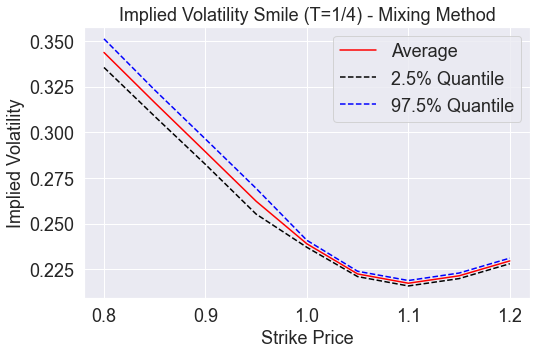

In [87]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) - Mixing Method',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [88]:
conf_width4=implied_volatility_upper-implied_volatility_lower
conf_width4

array([0.01569075, 0.01442641, 0.01390937, 0.01409177, 0.00383087,
       0.00291926, 0.00297968, 0.00304108, 0.00306446])

In [89]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

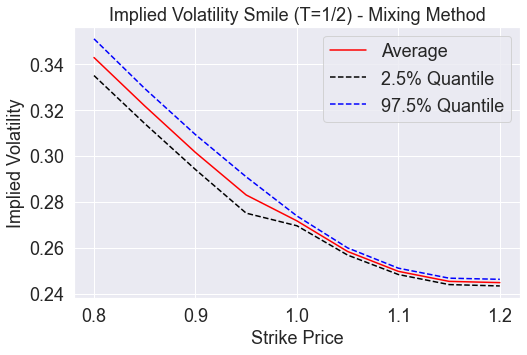

In [90]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) - Mixing Method',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [91]:
conf_width5=implied_volatility_upper-implied_volatility_lower
conf_width5

array([0.01598832, 0.01527126, 0.01520351, 0.01583142, 0.00426763,
       0.0031343 , 0.00276033, 0.00278795, 0.00288937])

In [92]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

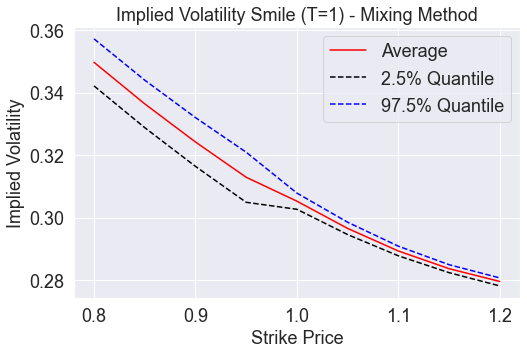

In [93]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) - Mixing Method',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [94]:
conf_width6=implied_volatility_upper-implied_volatility_lower
conf_width6

array([0.01504478, 0.01518327, 0.01560536, 0.01601733, 0.0051802 ,
       0.0039451 , 0.00308127, 0.00254478, 0.00256445])

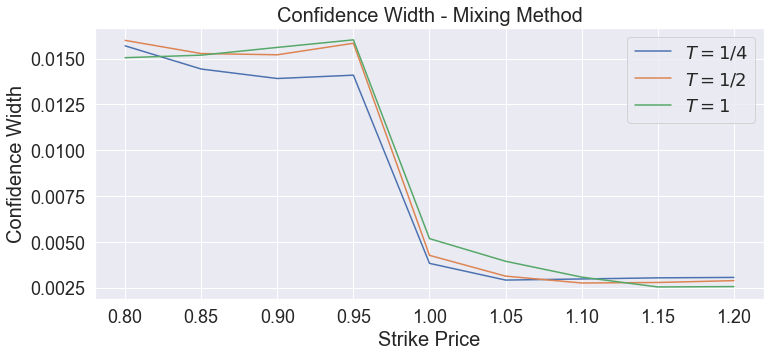

In [98]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width4,label = r"$T=1/4$")
plt.plot(strikes, conf_width5,label = r"$T=1/2$")
plt.plot(strikes, conf_width6,label = r"$T=1$")
plt.title('Confidence Width - Mixing Method',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

# Q2-b-i Deterministic Variance Path

Simulate stock price paths of the Heston model and simultaneously the deterministic volatility model.

Following for all IV generation, use Newton method

In [100]:
def stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims):

    # time grid
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    # generate standard brownian motion for stock price process and variance process
    MU = np.array([0,0])
    COV = np.matrix([[1, rho],[rho,1]])
    e = np.random.multivariate_normal(MU,COV,size=(Nsims,t.shape[0]))
    e_S = e[:,:,0]
    e_v = e[:,:,1]
    
    # Heston Model variance process
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    # deterministic variance process
    vt_bar = np.zeros(NdT)
    vt_bar[0] = v0
    c = np.zeros(NdT)
    Xt_Y1 = np.zeros((Nsims,NdT))
    Xt_Y1[:,0] = np.log(S0)
    # Euler discretization of stock price process
    Xt = np.zeros((Nsims, NdT))
    Xt[:,0] = np.log(S0)
    # correction ofr Milstein discretization
    correction = 0.25*eta**2*(e_v**2-1)*dt
    
    for i in range(len(t)-1):
        
        # Milstein discretization of vt
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*e_v[:,i] + correction[:,i]
        
        # Euler discretization of Xt
        Xt[:,i+1] = Xt[:,i] - 0.5*np.maximum(vt[:,i],0)*dt + np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*e_S[:,i]
                
        # Deterministic variance process
        vt_bar[i+1] = v0*np.exp(-kappa*t[i+1]) + theta*(1-np.exp(-kappa*t[i+1]))
        
        # Deterministic variance process based stock price process
        c[i+1] = (v0-theta)*(1-np.exp(-kappa*t[i+1]))/kappa + theta*t[i+1]
        Xt_Y1[:,i+1] = Xt_Y1[:,i]-0.5*vt_bar[i]*dt + np.sqrt(vt_bar[i])*sqrt_dt*e_S[:,i]
        
    St = np.exp(Xt)
    St_Y1 = np.exp(Xt_Y1)
    
    return t, St, St_Y1

In [101]:
t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

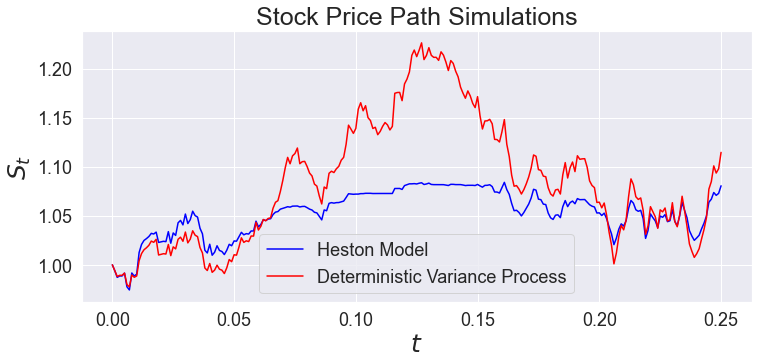

In [102]:
plt.figure(figsize=(12,5))
plt.plot(t,St[1,:],color='blue',label='Heston Model')
plt.plot(t,St_Y1[1,:],color='red',label='Deterministic Variance Process')
plt.title('Stock Price Path Simulations')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')
plt.legend()
plt.show()

In [103]:
t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)

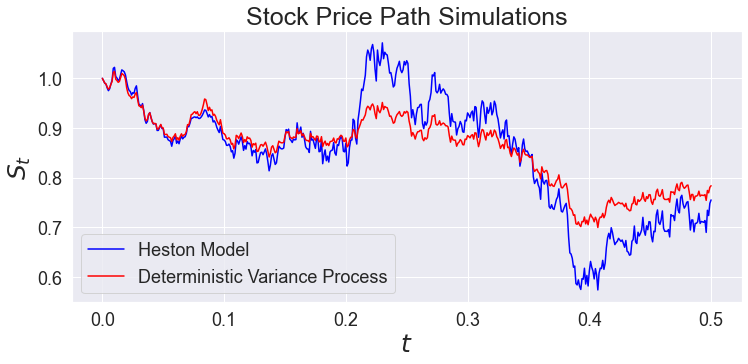

In [104]:
plt.figure(figsize=(12,5))
plt.plot(t,St[1,:],color='blue',label='Heston Model')
plt.plot(t,St_Y1[1,:],color='red',label='Deterministic Variance Process')
plt.title('Stock Price Path Simulations')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')
plt.legend()
plt.show()

In [105]:
t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

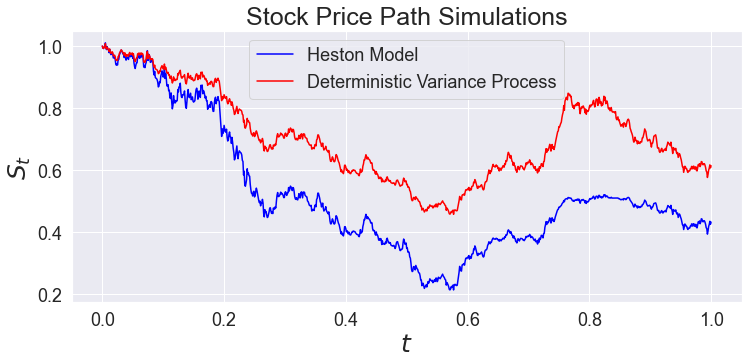

In [106]:
plt.figure(figsize=(12,5))
plt.plot(t,St[1,:],color='blue',label='Heston Model')
plt.plot(t,St_Y1[1,:],color='red',label='Deterministic Variance Process')
plt.title('Stock Price Path Simulations')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')
plt.legend()
plt.show()

# Q2(c)-i-A Use the Option Price (Deterministic Variance Process) as a Control Variate

Compute implied volatilities for different maturities.

In [107]:
def IV_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y1 = np.maximum((strikes[i]-St_Y1[:,-1]),0)
            gamma1 = np.cov(payoff_X,payoff_Y1)[0,1] / np.var(payoff_Y1)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = strikes[i]*norm.cdf(-dm) - S0*norm.cdf(-dp)
            option_mkt_price[i] = np.mean(payoff_X) + gamma1*(h1-np.mean(payoff_Y1))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)

        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y1 = np.maximum((St_Y1[:,-1]-strikes[i]),0)
            gamma1 = np.cov(payoff_X,payoff_Y1)[0,1] / np.var(payoff_Y1)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = S0*norm.cdf(dp) - strikes[i]*norm.cdf(dm)
            option_mkt_price[i] = np.mean(payoff_X) + gamma1*(h1-np.mean(payoff_Y1))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
        
    return option_mkt_price, strikes, implied_volatility

In [108]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_control_variate1(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_control_variate1(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_control_variate1(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

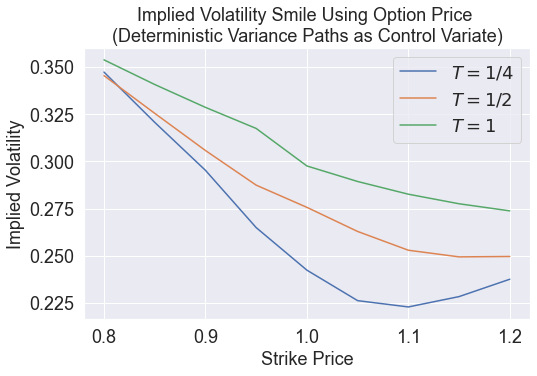

In [116]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile Using Option Price \n(Deterministic Variance Paths as Control Variate)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

Compute implied volatility confidence interval

In [112]:
def IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y1 = np.maximum((strikes[i]-St_Y1[:,-1]),0)
            gamma1 = np.cov(payoff_X,payoff_Y1)[0,1] / np.var(payoff_Y1)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = strikes[i]*norm.cdf(-dm) - S0*norm.cdf(-dp)
            option_mkt_price[i] = np.mean(payoff_X) + gamma1*(h1-np.mean(payoff_Y1))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y1)[0,1]**2/np.var(payoff_Y1))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y1 = np.maximum((St_Y1[:,-1]-strikes[i]),0)
            gamma1 = np.cov(payoff_X,payoff_Y1)[0,1] / np.var(payoff_Y1)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = S0*norm.cdf(dp) - strikes[i]*norm.cdf(dm)
            option_mkt_price[i] = np.mean(payoff_X) + gamma1*(h1-np.mean(payoff_Y1))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y1)[0,1]**2/np.var(payoff_Y1))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)      
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [113]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

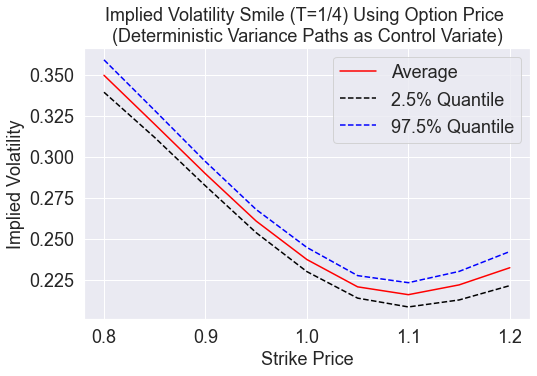

In [117]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) Using Option Price \n(Deterministic Variance Paths as Control Variate)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [118]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

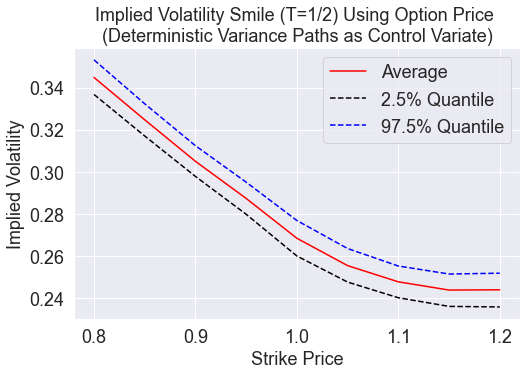

In [120]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) Using Option Price \n(Deterministic Variance Paths as Control Variate)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [121]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

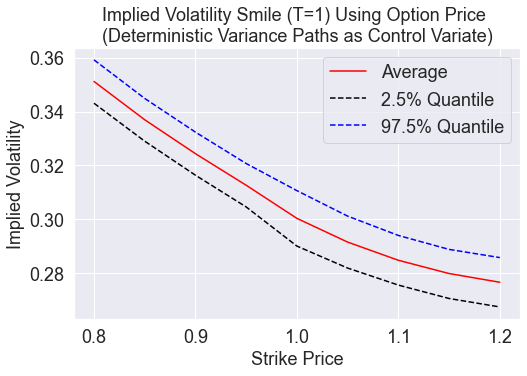

In [122]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) Using Option Price \n(Deterministic Variance Paths as Control Variate)',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

# Q2(b)-ii-Value of the Contingent Claim Paying $\int_{0}^{T} v_s\,ds$ 

Simulate the claim price using Milstein simulations and calculate the price analytically. Compare the simulations with analytical results

In [123]:
# simulate sample paths of variance process
def sim_vt_price(v0, kappa, theta,eta,T,Nsims):
    
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
   
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*Z + 0.25*eta**2*(Z**2-1)*dt
    
    # simulated price of claim
    V_sim = np.zeros(NdT)
    integrate_vt = np.cumsum(vt*dt, axis=1)
    for i in range(1,len(t)):
        V_sim[i] = np.mean(integrate_vt[:,i-1],axis=0)
        
    # calculate the analytical price of the claims
    V_analytical = np.zeros(NdT)
    for i in range(len(t)):
        V_analytical[i] = (v0-theta)*(1-np.exp(-kappa*t[i]))/kappa + theta*t[i]
    
    return t, V_sim, V_analytical

In [124]:
t, V_sim, V_analytical = sim_vt_price(v0, kappa, theta,eta,T=1,Nsims=5000)

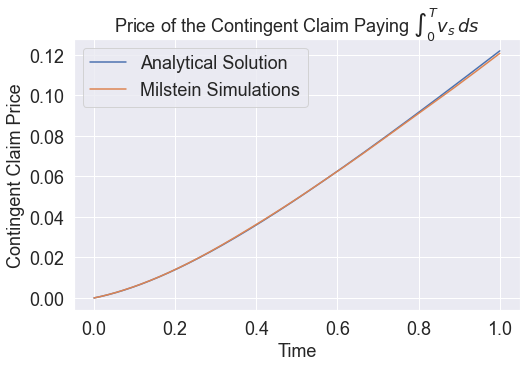

In [126]:
plt.figure(figsize=(8,5))
plt.plot(t,V_analytical,label="Analytical Solution")
plt.plot(t,V_sim,label="Milstein Simulations")
plt.title(r'Price of the Contingent Claim Paying $\int_{0}^{T} v_s\,ds$',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Contingent Claim Price',fontsize=18)
plt.legend()
plt.show()

# Q2(c)-i-B Implied Volatility Calc. Using $\int_{0}^{T} v_s\,ds$ as Control Variate

Obtain the Y2 simulations (i.e., the claims payoff)

In [127]:
def PayoffY2(v0, kappa, theta,eta,T,Nsims):
    
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
   
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*Z + 0.25*eta**2*(Z**2-1)*dt
    
    # simulated price of claim
    V_sim = np.zeros((Nsims,NdT))
    
    integrate_vt = np.cumsum(vt*dt, axis=1)
    for i in range(1,len(t)):
        V_sim[:,i] = integrate_vt[:,i-1]
    
    # calculate the analytical price of the claims
    V_analytical = np.zeros(NdT)
    for i in range(len(t)):
        V_analytical[i] = (v0-theta)*(1-np.exp(-kappa*t[i]))/kappa + theta*t[i]
    
    return V_sim[:,-1], V_analytical[-1]

In [128]:
payoff_Y2, h2 = PayoffY2(v0, kappa, theta,eta,T=1/4,Nsims=5000)

In [129]:
def IV_control_variate2(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y2)[0,1] / np.var(payoff_Y2)
            option_mkt_price[i] = np.mean(payoff_X) + gamma2*(h2-np.mean(payoff_Y2))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)

        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y2)[0,1] / np.var(payoff_Y2)
            option_mkt_price[i] = np.mean(payoff_X) + gamma2*(h2-np.mean(payoff_Y2))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
        
    return option_mkt_price, strikes, implied_volatility

In [130]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_control_variate2(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_control_variate2(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_control_variate2(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

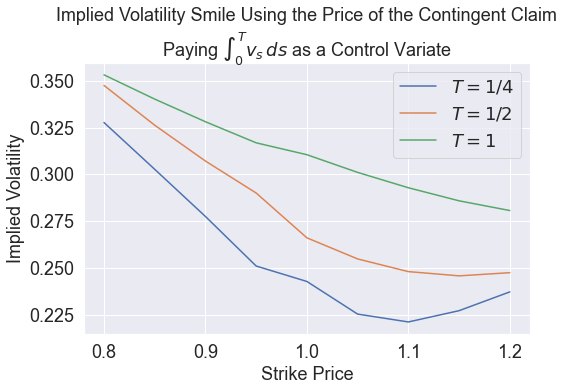

In [131]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile Using the Price of the Contingent Claim'+'\n'+r'Paying $\int_{0}^{T} v_s\,ds$ as a Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [132]:
def IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y2)[0,1] / np.var(payoff_Y2)
            option_mkt_price[i] = np.mean(payoff_X) + gamma2*(h2-np.mean(payoff_Y2))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y2)[0,1]**2/np.var(payoff_Y2))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y2)[0,1] / np.var(payoff_Y2)
            option_mkt_price[i] = np.mean(payoff_X) + gamma2*(h2-np.mean(payoff_Y2))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y2)[0,1]**2/np.var(payoff_Y2))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)      
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [141]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

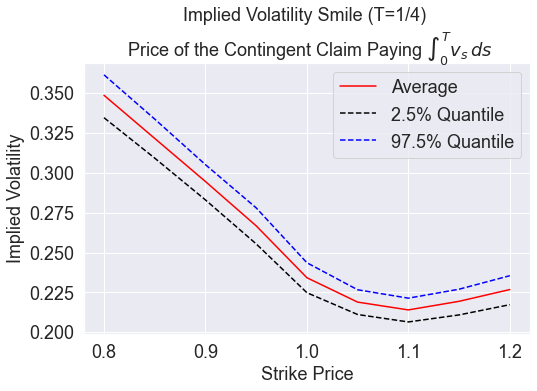

In [142]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) \n Price of the Contingent Claim Paying $\int_{0}^{T} v_s\,ds$',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [143]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

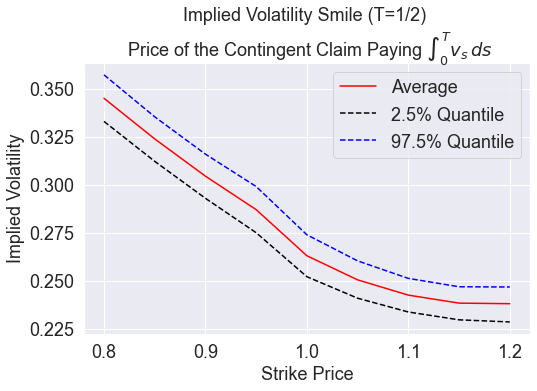

In [144]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) \n Price of the Contingent Claim Paying $\int_{0}^{T} v_s\,ds$',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [145]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

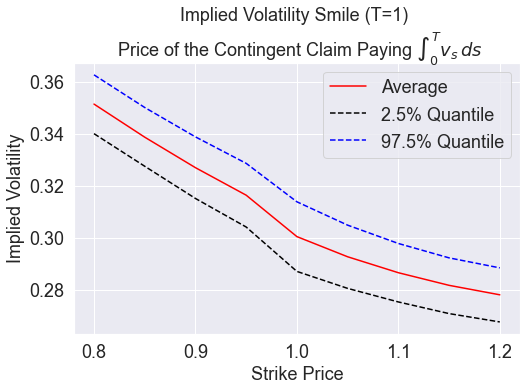

In [146]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) \n Price of the Contingent Claim Paying $\int_{0}^{T} v_s\,ds$',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

# Q2(b)-iii-Value of the Contingent Claim Paying $\int_{0}^{T} v_s^2\,ds$ 

Simulate the claim price using Milstein simulations and calculate the price analytically. Compare the simulation with analytical

In [147]:
# simulate sample paths of variance process
def sim_vt_price(v0, kappa, theta,eta,T,Nsims):
    
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
   
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*Z + 0.25*eta**2*(Z**2-1)*dt
    
    # simulated price of claim
    V_sim = np.zeros(NdT)
    integrate_vt = np.cumsum(vt**2*dt, axis=1)
    for i in range(1,len(t)):
        V_sim[i] = np.mean(integrate_vt[:,i-1],axis=0)
        
    # calculate the analytical price of the claims
    V_analytical = np.zeros(NdT)
    for i in range(len(t)):
        V_analytical[i] = -0.0074*(np.exp(-2*3*t[i])-1)+0.0428*(np.exp(-3*t[i])-1)+0.0856*t[i]
    
    return t, V_sim, V_analytical

In [148]:
t, V_sim, V_analytical = sim_vt_price(v0, kappa, theta,eta,T=1,Nsims=5000)

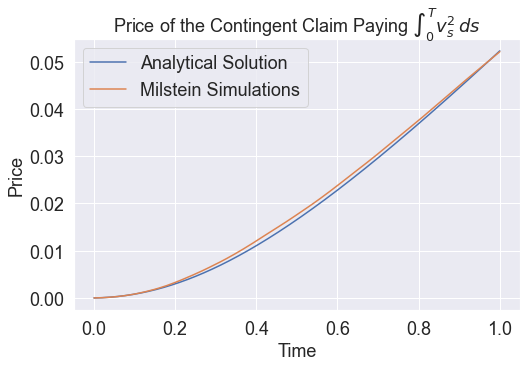

In [149]:
plt.figure(figsize=(8,5))
plt.plot(t,V_analytical,label="Analytical Solution")
plt.plot(t,V_sim,label="Milstein Simulations")
plt.title(r'Price of the Contingent Claim Paying $\int_{0}^{T} v_s^2\,ds$',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend()
plt.show()

Verify the analytical ODE solution

In [150]:
# last part
(2*kappa*theta+eta**2)*theta/(2*kappa)

0.08560000000000001

In [151]:
# second part coefficient
(2*kappa*theta+eta**2)*(v0-theta)/kappa

-0.12840000000000004

In [152]:
# first part coefficient
v0**2-(1/kappa)*(2*kappa*theta+eta**2)*(v0-theta)-1/(2*kappa)*(2*kappa*theta+eta**2)*theta

0.044399999999999995

# Q2(c)-i-C-Implied Volatility Calc. Using the Contingent Claim Paying $\int_{0}^{T} v_s^2\,ds$ as Control Variate

In [153]:
def PayoffY3(v0, kappa, theta,eta,T,Nsims):
    
    NdT = int(T/(1/1000)+1)
    t = np.linspace(0,T,NdT)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    
    vt = np.zeros((Nsims, NdT))
    vt[:,0] = v0
    
    for i in range(len(t)-1):
        
        Z = np.random.randn(Nsims)
   
        vt[:,i+1] = vt[:,i] + kappa*(theta-np.maximum(vt[:,i],0))*dt + eta*np.sqrt(np.maximum(vt[:,i],0))*sqrt_dt*Z + 0.25*eta**2*(Z**2-1)*dt
    
    # simulated price of claim
    V_sim = np.zeros((Nsims,NdT))
    
    integrate_vt = np.cumsum(vt**2*dt, axis=1)
    for i in range(1,len(t)):
        V_sim[:,i] = integrate_vt[:,i-1]
    
    # calculate the analytical price of the claims
    V_analytical = np.zeros(NdT)
    for i in range(len(t)):
        V_analytical[i] = -0.0074*(np.exp(-2*3*t[i])-1)+0.0428*(np.exp(-3*t[i])-1)+0.0856*t[i]
    
    return V_sim[:,-1], V_analytical[-1]

In [154]:
def IV_control_variate3(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            gamma3 = np.cov(payoff_X,payoff_Y3)[0,1] / np.var(payoff_Y3)
            option_mkt_price[i] = np.mean(payoff_X) + gamma3*(h3-np.mean(payoff_Y3))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)

        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y3,h3 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y3)[0,1] / np.var(payoff_Y3)
            option_mkt_price[i] = np.mean(payoff_X) + gamma3*(h3-np.mean(payoff_Y3))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
        
    return option_mkt_price, strikes, implied_volatility

In [155]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_control_variate3(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_control_variate3(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_control_variate3(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

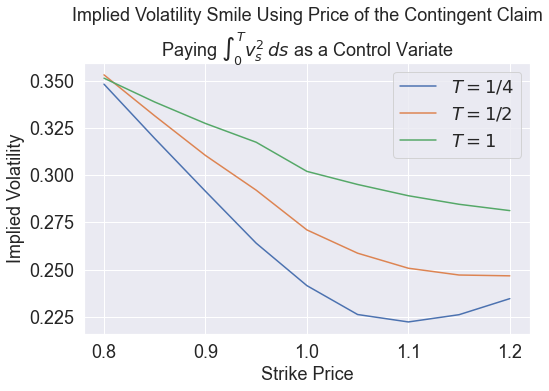

In [156]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile Using Price of the Contingent Claim'+'\n'+r'Paying $\int_{0}^{T} v_s^2\,ds$ as a Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [157]:
def IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            gamma2 = np.cov(payoff_X,payoff_Y3)[0,1] / np.var(payoff_Y3)
            option_mkt_price[i] = np.mean(payoff_X) + gamma2*(h2-np.mean(payoff_Y3))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y3)[0,1]**2/np.var(payoff_Y3))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            payoff_Y3,h3 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            gamma3 = np.cov(payoff_X,payoff_Y3)[0,1] / np.var(payoff_Y3)
            option_mkt_price[i] = np.mean(payoff_X) + gamma3*(h2-np.mean(payoff_Y3))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,payoff_Y3)[0,1]**2/np.var(payoff_Y3))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)      
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [160]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

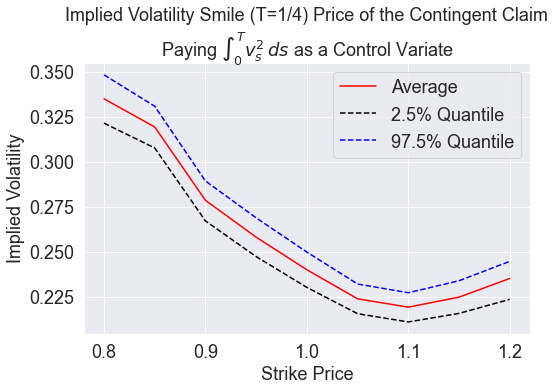

In [161]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) Price of the Contingent Claim'+'\n'+r'Paying $\int_{0}^{T} v_s^2\,ds$ as a Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [166]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

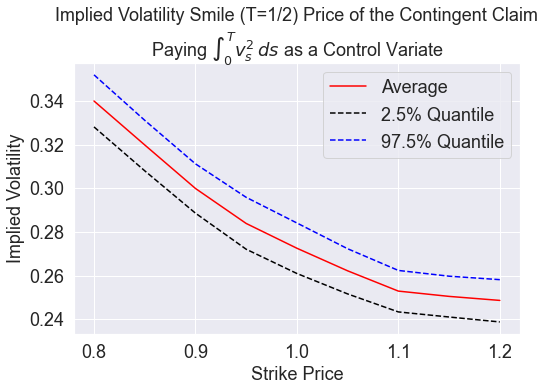

In [167]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) Price of the Contingent Claim'+'\n'+r'Paying $\int_{0}^{T} v_s^2\,ds$ as a Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [180]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

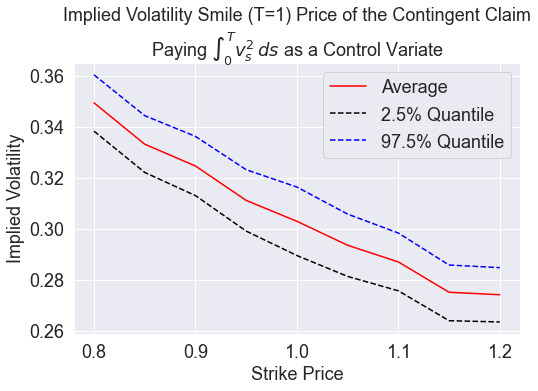

In [181]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) Price of the Contingent Claim'+'\n'+r'Paying $\int_{0}^{T} v_s^2\,ds$ as a Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

# Q2.(c)-i-D Implied Volatility Calc. Using Stock as Control Variate

Implied volatilities for different maturities

In [182]:
def IV_control_variate4(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            Y4 = St[:,-1]
            gamma4 = np.cov(payoff_X,Y4)[0,1] / np.var(Y4)
            h4 = S0
            option_mkt_price[i] = np.mean(payoff_X) + gamma4*(h4-np.mean(Y4))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)

        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            Y4 = St[:,-1]
            gamma4 = np.cov(payoff_X,Y4)[0,1] / np.var(Y4)
            h4 = S0
            option_mkt_price[i] = np.mean(payoff_X) + gamma4*(h4-np.mean(Y4))
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
        
    return option_mkt_price, strikes, implied_volatility

In [183]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_control_variate4(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_control_variate4(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_control_variate4(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

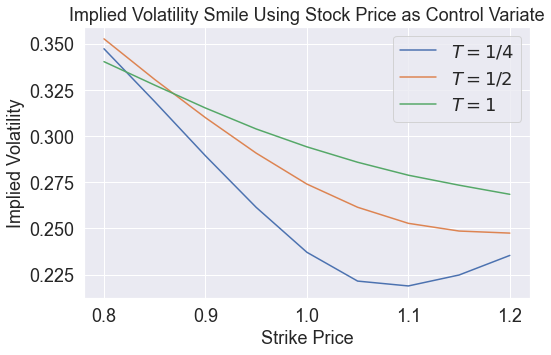

In [184]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile Using Stock Price as Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [185]:
def IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)
    
    strikes = np.arange(0.8,1.25,0.05)
    
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):
        
        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            Y4 = St[:,-1]
            gamma4 = np.cov(payoff_X,Y4)[0,1] / np.var(Y4)
            h4 = S0
            option_mkt_price[i] = np.mean(payoff_X) + gamma4*(h4-np.mean(Y4))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,Y4)[0,1]**2/np.var(Y4))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            # call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            Y4 = St[:,-1]
            gamma4 = np.cov(payoff_X,Y4)[0,1] / np.var(Y4)
            h4 = S0
            option_mkt_price[i] = np.mean(payoff_X) + gamma4*(h4-np.mean(Y4))
            std_deviation = np.sqrt(np.var(payoff_X)-np.cov(payoff_X,Y4)[0,1]**2/np.var(Y4))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)      
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [186]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

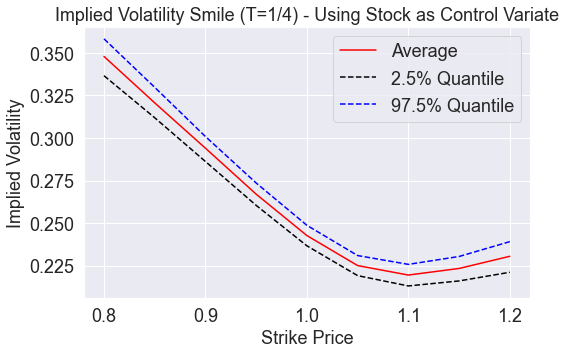

In [187]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) - Using Stock as Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [188]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

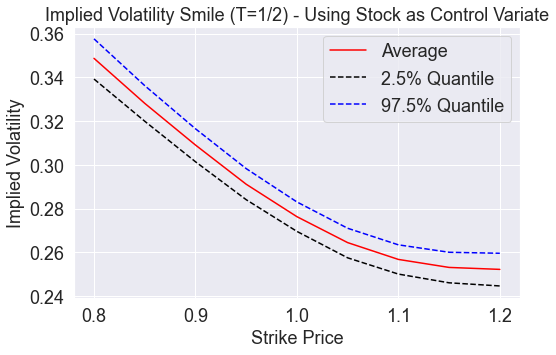

In [189]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) - Using Stock as Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [190]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

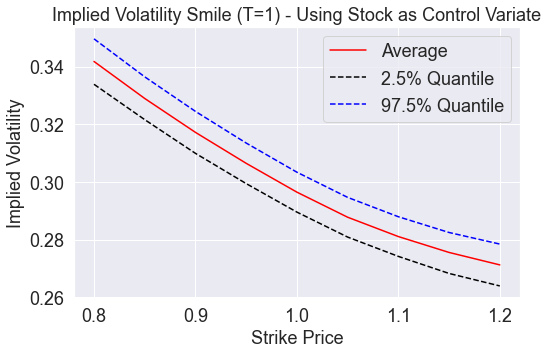

In [191]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) - Using Stock as Control Variate',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

# Q2.-(c)-ii Implied Volatility Calc. Using All Control Variates

In [192]:
def IV_control_variate_all(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)

    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    for i in range(len(strikes)):

        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            # control variate 1 (deterministic variance process)
            payoff_Y1 = np.maximum((strikes[i]-St_Y1[:,-1]),0)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = strikes[i]*norm.cdf(-dm) - S0*norm.cdf(-dp)
            # control variate 2( the claim paying vs*ds )
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            # control variate 3( the claim paying vs**2*ds )
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            # control variate 4( stock )
            Y4 = St[:,-1]
            h4 = S0

            l11 = np.var(payoff_Y1)
            l12 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l13 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l14 = np.cov(payoff_Y1,Y4)[0,1]
            r1 = np.cov(payoff_X,payoff_Y1)[0,1]

            l21 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l22 = np.var(payoff_Y2)
            l23 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l24 = np.cov(payoff_Y2,Y4)[0,1]
            r2 = np.cov(payoff_X,payoff_Y2)[0,1]

            l31 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l32 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l33 = np.var(payoff_Y3)
            l34 = np.cov(payoff_Y3,Y4)[0,1]
            r3 = np.cov(payoff_X,payoff_Y3)[0,1]

            l41 = np.cov(payoff_Y1,Y4)[0,1]
            l42 = np.cov(payoff_Y2,Y4)[0,1]
            l43 = np.cov(payoff_Y3,Y4)[0,1]
            l44 = np.var(Y4)
            r4 = np.cov(payoff_X,Y4)[0,1]

            LHS = np.array([[l11,l12,l13,l14],[l21,l22,l23,l24],[l31,l32,l33,l34],[l41,l42,l43,l44]])
            RHS = np.array([r1,r2,r3,r4])

            gamma = np.linalg.solve(LHS,RHS)

            option_mkt_price[i] = np.mean(payoff_X) + gamma[0]*(h1-np.mean(payoff_Y1)) + gamma[1]*(h2-np.mean(payoff_Y2)) + gamma[2]*(h3-np.mean(payoff_Y3))+ gamma[3]*(h4 - np.mean(Y4))
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            #call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            # control variate 1 (deterministic variance process)
            payoff_Y1 = np.maximum((St_Y1[:,-1]-strikes[i]),0)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = S0*norm.cdf(dp) - strikes[i]*norm.cdf(dm)
            # control variate 2( the claim paying vs*ds )
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            # control variate 3( the claim paying vs**2*ds )
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            # control variate 4( stock )
            Y4 = St[:,-1]
            h4 = S0

            l11 = np.var(payoff_Y1)
            l12 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l13 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l14 = np.cov(payoff_Y1,Y4)[0,1]
            r1 = np.cov(payoff_X,payoff_Y1)[0,1]

            l21 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l22 = np.var(payoff_Y2)
            l23 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l24 = np.cov(payoff_Y2,Y4)[0,1]
            r2 = np.cov(payoff_X,payoff_Y2)[0,1]

            l31 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l32 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l33 = np.var(payoff_Y3)
            l34 = np.cov(payoff_Y3,Y4)[0,1]
            r3 = np.cov(payoff_X,payoff_Y3)[0,1]

            l41 = np.cov(payoff_Y1,Y4)[0,1]
            l42 = np.cov(payoff_Y2,Y4)[0,1]
            l43 = np.cov(payoff_Y3,Y4)[0,1]
            l44 = np.var(Y4)
            r4 = np.cov(payoff_X,Y4)[0,1]

            LHS = np.array([[l11,l12,l13,l14],[l21,l22,l23,l24],[l31,l32,l33,l34],[l41,l42,l43,l44]])
            RHS = np.array([r1,r2,r3,r4])

            gamma = np.linalg.solve(LHS,RHS)

            option_mkt_price[i] = np.mean(payoff_X) + gamma[0]*(h1-np.mean(payoff_Y1)) + gamma[1]*(h2-np.mean(payoff_Y2)) + gamma[2]*(h3-np.mean(payoff_Y3))+ gamma[3]*(h4 - np.mean(Y4))
            
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return option_mkt_price, strikes, implied_volatility

In [193]:
option_mkt_price_quarter, strikes, implied_volatility_quarter = IV_control_variate_all(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)
option_mkt_price_halfyear, strikes, implied_volatility_halfyear = IV_control_variate_all(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)
option_mkt_price_year, strikes, implied_volatility_year = IV_control_variate_all(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

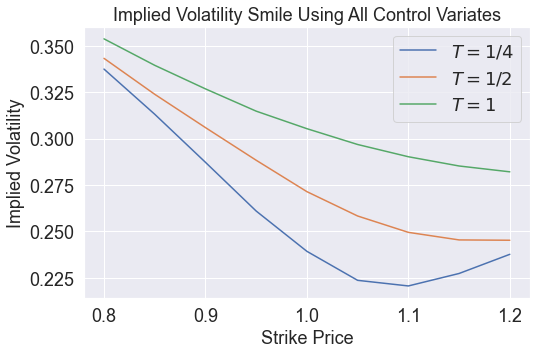

In [194]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility_quarter,label = r"$T=1/4$")
plt.plot(strikes, implied_volatility_halfyear,label = r"$T=1/2$")
plt.plot(strikes, implied_volatility_year,label = r"$T=1$")
plt.title('Implied Volatility Smile Using All Control Variates',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [195]:
def IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T, Nsims):
    
    t, St, St_Y1 = stock_control_variate1(S0, v0, rho, kappa, theta, eta, T, Nsims)

    strikes = np.arange(0.8,1.25,0.05)
    option_mkt_price = np.zeros(len(strikes))
    implied_volatility = np.zeros(len(strikes))
    
    # 2.5% confidence interval
    option_mkt_price_lower = np.zeros(len(strikes))
    implied_volatility_lower = np.zeros(len(strikes))
    
    # 97.5% confidence interval
    option_mkt_price_upper = np.zeros(len(strikes))
    implied_volatility_upper = np.zeros(len(strikes))
    
    for i in range(len(strikes)):

        if strikes[i] < S0:
            
            # put option
            payoff_X = np.maximum((strikes[i]-St[:,-1]),0)
            # control variate 1 (deterministic variance process)
            payoff_Y1 = np.maximum((strikes[i]-St_Y1[:,-1]),0)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = strikes[i]*norm.cdf(-dm) - S0*norm.cdf(-dp)
            # control variate 2( the claim paying vs*ds )
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            # control variate 3( the claim paying vs**2*ds )
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            # control variate 4( stock )
            Y4 = St[:,-1]
            h4 = S0

            l11 = np.var(payoff_Y1)
            l12 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l13 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l14 = np.cov(payoff_Y1,Y4)[0,1]
            r1 = np.cov(payoff_X,payoff_Y1)[0,1]

            l21 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l22 = np.var(payoff_Y2)
            l23 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l24 = np.cov(payoff_Y2,Y4)[0,1]
            r2 = np.cov(payoff_X,payoff_Y2)[0,1]

            l31 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l32 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l33 = np.var(payoff_Y3)
            l34 = np.cov(payoff_Y3,Y4)[0,1]
            r3 = np.cov(payoff_X,payoff_Y3)[0,1]

            l41 = np.cov(payoff_Y1,Y4)[0,1]
            l42 = np.cov(payoff_Y2,Y4)[0,1]
            l43 = np.cov(payoff_Y3,Y4)[0,1]
            l44 = np.var(Y4)
            r4 = np.cov(payoff_X,Y4)[0,1]

            LHS = np.array([[l11,l12,l13,l14],[l21,l22,l23,l24],[l31,l32,l33,l34],[l41,l42,l43,l44]])
            RHS = np.array([r1,r2,r3,r4])

            gamma = np.linalg.solve(LHS,RHS)
            std_deviation1 = np.var(payoff_X) + gamma[0]**2*np.var(payoff_Y1) + gamma[1]**2*np.var(payoff_Y2) + gamma[2]**2*np.var(payoff_Y3) + gamma[3]**2*np.var(Y4)
            std_deviation2 = -2*gamma[0]*np.cov(payoff_X,payoff_Y1)[0,1] -2*gamma[1]*np.cov(payoff_X,payoff_Y2)[0,1] -2*gamma[2]*np.cov(payoff_X,payoff_Y3)[0,1] -2*gamma[3]*np.cov(payoff_X,Y4)[0,1]
            std_deviation3 = 2*gamma[0]*gamma[1]*np.cov(payoff_Y1,payoff_Y2)[0,1] + 2*gamma[0]*gamma[2]*np.cov(payoff_Y1,payoff_Y3)[0,1] + 2*gamma[0]*gamma[3]*np.cov(payoff_Y1,Y4)[0,1]
            std_deviation4 = 2*gamma[1]*gamma[2]*np.cov(payoff_Y2,payoff_Y3)[0,1] + 2*gamma[1]*gamma[3]*np.cov(payoff_Y2,Y4)[0,1]
            std_deviation5 = 2*gamma[2]*gamma[3]*np.cov(payoff_Y3,Y4)[0,1]
            std_deviation = np.sqrt(std_deviation1 + std_deviation2 + std_deviation3 + std_deviation4 + std_deviation5)
            
            option_mkt_price[i] = np.mean(payoff_X) + gamma[0]*(h1-np.mean(payoff_Y1)) + gamma[1]*(h2-np.mean(payoff_Y2)) + gamma[2]*(h3-np.mean(payoff_Y3))+ gamma[3]*(h4 - np.mean(Y4))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate put price implied volatility
            implied_volatility[i] = implied_volatility_put(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_put(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_put(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
        elif strikes[i] >= S0:
            
            #call option
            payoff_X = np.maximum((St[:,-1]-strikes[i]),0)
            # control variate 1 (deterministic variance process)
            payoff_Y1 = np.maximum((St_Y1[:,-1]-strikes[i]),0)
            c = (v0-theta)*(1-np.exp(-kappa*T))/kappa + theta*T
            dp = (np.log(S0/strikes[i]) + 0.5*c)/np.sqrt(c)
            dm = (np.log(S0/strikes[i]) - 0.5*c)/np.sqrt(c)
            h1 = S0*norm.cdf(dp) - strikes[i]*norm.cdf(dm)
            # control variate 2( the claim paying vs*ds )
            payoff_Y2,h2 = PayoffY2(v0, kappa, theta,eta,T,Nsims)
            # control variate 3( the claim paying vs**2*ds )
            payoff_Y3,h3 = PayoffY3(v0, kappa, theta,eta,T,Nsims)
            # control variate 4( stock )
            Y4 = St[:,-1]
            h4 = S0

            l11 = np.var(payoff_Y1)
            l12 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l13 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l14 = np.cov(payoff_Y1,Y4)[0,1]
            r1 = np.cov(payoff_X,payoff_Y1)[0,1]

            l21 = np.cov(payoff_Y1,payoff_Y2)[0,1]
            l22 = np.var(payoff_Y2)
            l23 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l24 = np.cov(payoff_Y2,Y4)[0,1]
            r2 = np.cov(payoff_X,payoff_Y2)[0,1]

            l31 = np.cov(payoff_Y1,payoff_Y3)[0,1]
            l32 = np.cov(payoff_Y2,payoff_Y3)[0,1]
            l33 = np.var(payoff_Y3)
            l34 = np.cov(payoff_Y3,Y4)[0,1]
            r3 = np.cov(payoff_X,payoff_Y3)[0,1]

            l41 = np.cov(payoff_Y1,Y4)[0,1]
            l42 = np.cov(payoff_Y2,Y4)[0,1]
            l43 = np.cov(payoff_Y3,Y4)[0,1]
            l44 = np.var(Y4)
            r4 = np.cov(payoff_X,Y4)[0,1]

            LHS = np.array([[l11,l12,l13,l14],[l21,l22,l23,l24],[l31,l32,l33,l34],[l41,l42,l43,l44]])
            RHS = np.array([r1,r2,r3,r4])

            gamma = np.linalg.solve(LHS,RHS)
            std_deviation1 = np.var(payoff_X) + gamma[0]**2*np.var(payoff_Y1) + gamma[1]**2*np.var(payoff_Y2) + gamma[2]**2*np.var(payoff_Y3) + gamma[3]**2*np.var(Y4)
            std_deviation2 = -2*gamma[0]*np.cov(payoff_X,payoff_Y1)[0,1] -2*gamma[1]*np.cov(payoff_X,payoff_Y2)[0,1] -2*gamma[2]*np.cov(payoff_X,payoff_Y3)[0,1] -2*gamma[3]*np.cov(payoff_X,Y4)[0,1]
            std_deviation3 = 2*gamma[0]*gamma[1]*np.cov(payoff_Y1,payoff_Y2)[0,1] + 2*gamma[0]*gamma[2]*np.cov(payoff_Y1,payoff_Y3)[0,1] + 2*gamma[0]*gamma[3]*np.cov(payoff_Y1,Y4)[0,1]
            std_deviation4 = 2*gamma[1]*gamma[2]*np.cov(payoff_Y2,payoff_Y3)[0,1] + 2*gamma[1]*gamma[3]*np.cov(payoff_Y2,Y4)[0,1]
            std_deviation5 = 2*gamma[2]*gamma[3]*np.cov(payoff_Y3,Y4)[0,1]
            std_deviation = np.sqrt(std_deviation1 + std_deviation2 + std_deviation3 + std_deviation4 + std_deviation5)          

            option_mkt_price[i] = np.mean(payoff_X) + gamma[0]*(h1-np.mean(payoff_Y1)) + gamma[1]*(h2-np.mean(payoff_Y2)) + gamma[2]*(h3-np.mean(payoff_Y3))+ gamma[3]*(h4 - np.mean(Y4))
            option_mkt_price_lower[i] = option_mkt_price[i] - 1.96*std_deviation/np.sqrt(Nsims)
            option_mkt_price_upper[i] = option_mkt_price[i] + 1.96*std_deviation/np.sqrt(Nsims)
            
            # calculate call option implied volatility
            implied_volatility[i] = implied_volatility_call(option_mkt_price[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_lower[i] = implied_volatility_call(option_mkt_price_lower[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            implied_volatility_upper[i] = implied_volatility_call(option_mkt_price_upper[i], S0, strikes[i], T, r=0, tol=0.0001,max_iterations=100)
            
    return strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper

In [196]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

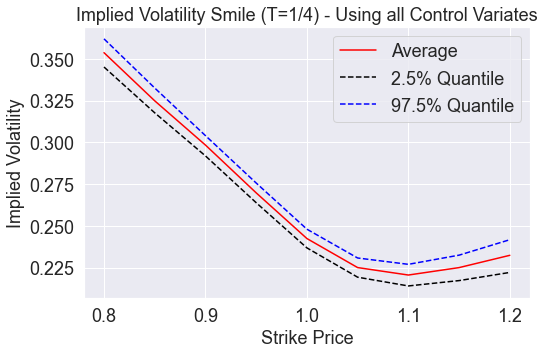

In [197]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/4) - Using all Control Variates',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [198]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)

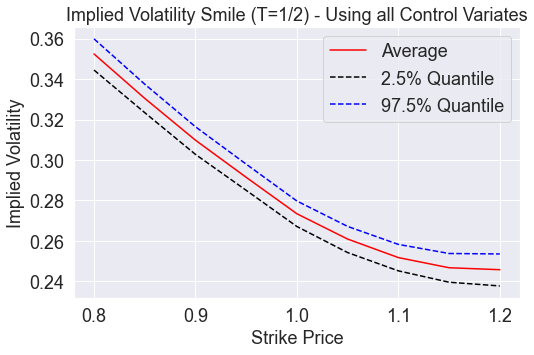

In [199]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1/2) - Using all Control Variates',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

In [200]:
strikes, implied_volatility, implied_volatility_lower, implied_volatility_upper = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

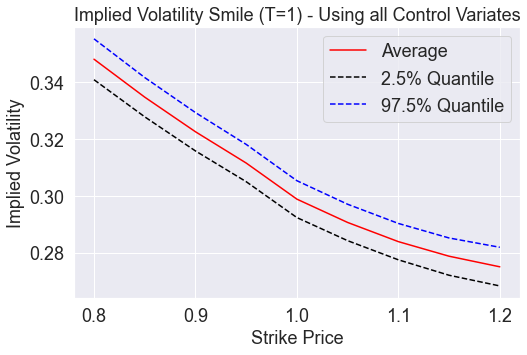

In [201]:
plt.figure(figsize=(8,5))
plt.plot(strikes, implied_volatility,label = "Average",color="red")
plt.plot(strikes, implied_volatility_lower,label = "2.5% Quantile",color="black",linestyle="dashed")
plt.plot(strikes, implied_volatility_upper,label = "97.5% Quantile",color="blue",linestyle="dashed")
plt.title('Implied Volatility Smile (T=1) - Using all Control Variates',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend()
plt.show()

# Comparison of Different Methods

## T=1/4 Implied Volatility Confidence Interval

In [202]:
# Euler discretization and Milstein discretization
strikes, implied_volatility1, implied_volatility_lower1, implied_volatility_upper1 = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [203]:
# Mixing method and Milstein discretization
strikes, implied_volatility2, implied_volatility_lower2, implied_volatility_upper2 = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [204]:
# option price control variate
strikes, implied_volatility3, implied_volatility_lower3, implied_volatility_upper3 = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [205]:
# the claim paying vs*ds
strikes, implied_volatility4, implied_volatility_lower4, implied_volatility_upper4 = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [206]:
# the claim paying vs**2*ds
strikes, implied_volatility5, implied_volatility_lower5, implied_volatility_upper5 = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [207]:
# the stock
strikes, implied_volatility6, implied_volatility_lower6, implied_volatility_upper6 = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5_000)

In [208]:
# all control variates
strikes, implied_volatility7, implied_volatility_lower7, implied_volatility_upper7 = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1/4, Nsims=5000)

In [209]:
conf_width1=implied_volatility_upper1-implied_volatility_lower1
conf_width2=implied_volatility_upper2-implied_volatility_lower2
conf_width3=implied_volatility_upper3-implied_volatility_lower3
conf_width4=implied_volatility_upper4-implied_volatility_lower4
conf_width5=implied_volatility_upper5-implied_volatility_lower5
conf_width6=implied_volatility_upper6-implied_volatility_lower6
conf_width7=implied_volatility_upper7-implied_volatility_lower7

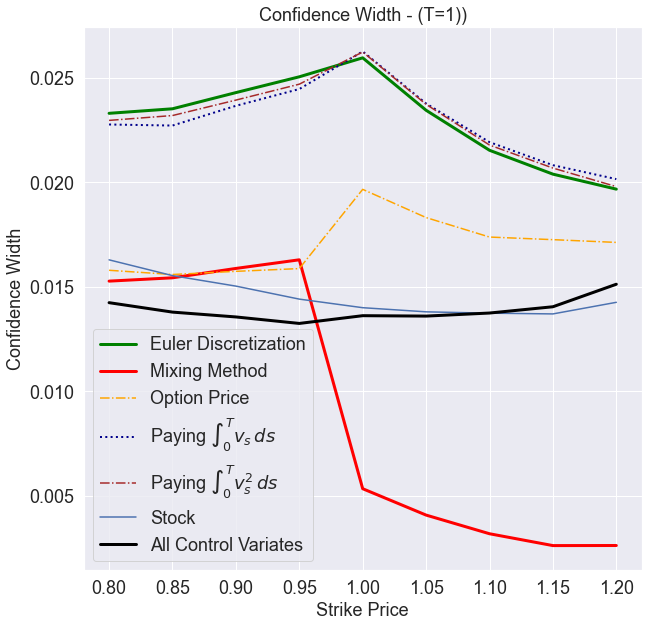

In [294]:
plt.figure(figsize=(10,10))
plt.plot(strikes, conf_width21,label = 'Euler Discretization',color='green',linestyle='-',linewidth=3)
plt.plot(strikes, conf_width22,label = 'Mixing Method',color='red',linestyle='-',linewidth=3)
#plt.plot(strikes, conf_width23,label = 'Option Price',color='orange',linestyle='-.')
#plt.plot(strikes, conf_width24,label = r'Paying $\int_{0}^{T} v_s\,ds$',color='darkblue',linestyle=':',linewidth=2)
#plt.plot(strikes, conf_width25,label = r'Paying $\int_{0}^{T} v_s^2\,ds$',color='brown',linestyle='-.')
#plt.plot(strikes, conf_width26,label = 'Stock')
plt.plot(strikes, conf_width27,label = 'All Control Variates',color='black',linestyle='-',linewidth=3)
plt.title('Confidence Width - (T=1))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Confidence Width',fontsize=18)
plt.legend(fontsize=18)
plt.show()

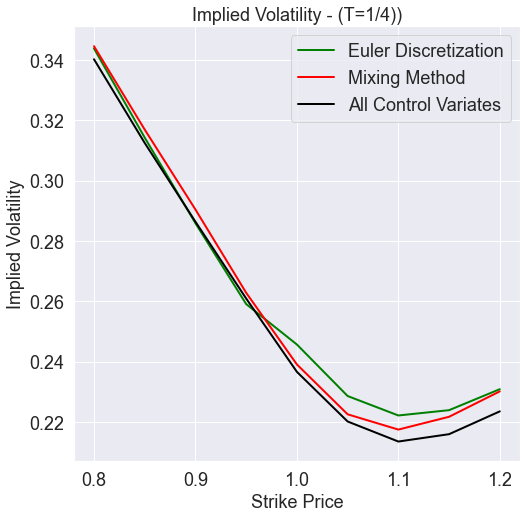

In [304]:
plt.figure(figsize=(8,8))
plt.plot(strikes, implied_volatility1,label = 'Euler Discretization',color='green',linestyle='-',linewidth=2)
plt.plot(strikes, implied_volatility2,label = 'Mixing Method',color='red',linestyle='-',linewidth=2)
#plt.plot(strikes, conf_width23,label = 'Option Price',color='orange',linestyle='-.')
#plt.plot(strikes, conf_width24,label = r'Paying $\int_{0}^{T} v_s\,ds$',color='darkblue',linestyle=':',linewidth=2)
#plt.plot(strikes, conf_width25,label = r'Paying $\int_{0}^{T} v_s^2\,ds$',color='brown',linestyle='-.')
#plt.plot(strikes, conf_width26,label = 'Stock')
plt.plot(strikes, implied_volatility7,label = 'All Control Variates',color='black',linestyle='-',linewidth=2)
plt.title('Implied Volatility - (T=1/4))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend(fontsize=18)
plt.show()

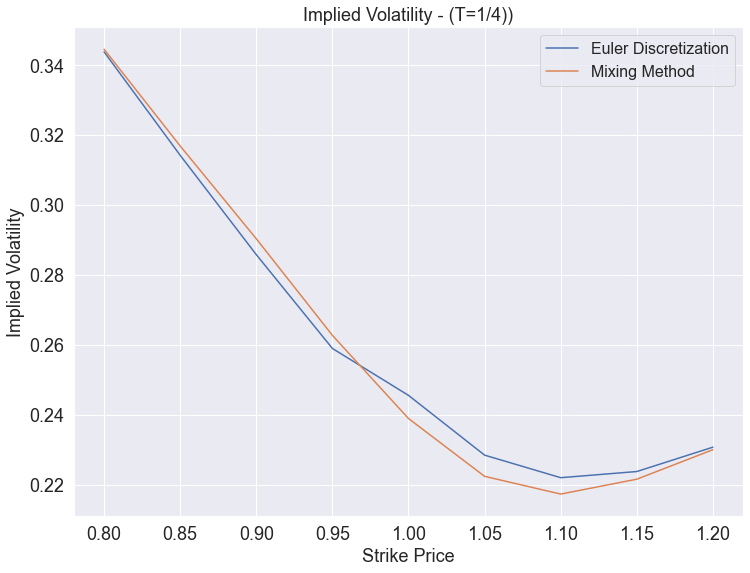

In [269]:
plt.figure(figsize=(12,9))
plt.plot(strikes, implied_volatility1,label = 'Euler Discretization')
plt.plot(strikes, implied_volatility2,label = 'Mixing Method')
#plt.plot(strikes, implied_volatility3,label = 'Option Price')
#plt.plot(strikes, implied_volatility4,label = r'Paying $\int_{0}^{T} v_s\,ds$')
#plt.plot(strikes, implied_volatility5,label = r'Paying $\int_{0}^{T} v_s^2\,ds$')
#plt.plot(strikes, implied_volatility6,label = 'Stock')
#plt.plot(strikes, implied_volatility7,label = 'All Control Variates')
plt.title('Implied Volatility - (T=1/4))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend(fontsize=16)
plt.show()

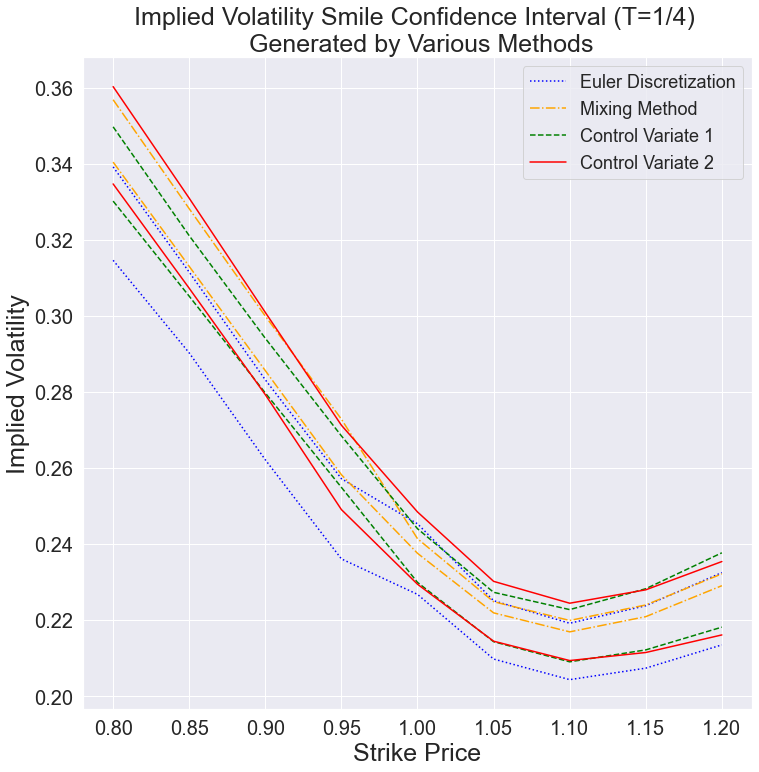

In [143]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower1,label='Euler Discretization',color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_upper1,color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower3,label='Control Variate 1',color='green',linestyle='--')
plt.plot(strikes,implied_volatility_upper3,color='green',linestyle='--')
plt.plot(strikes,implied_volatility_lower4,label='Control Variate 2',color='red',linestyle='-')
plt.plot(strikes,implied_volatility_upper4,color='red',linestyle='-')
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1/4) \n Generated by Various Methods')
plt.show()

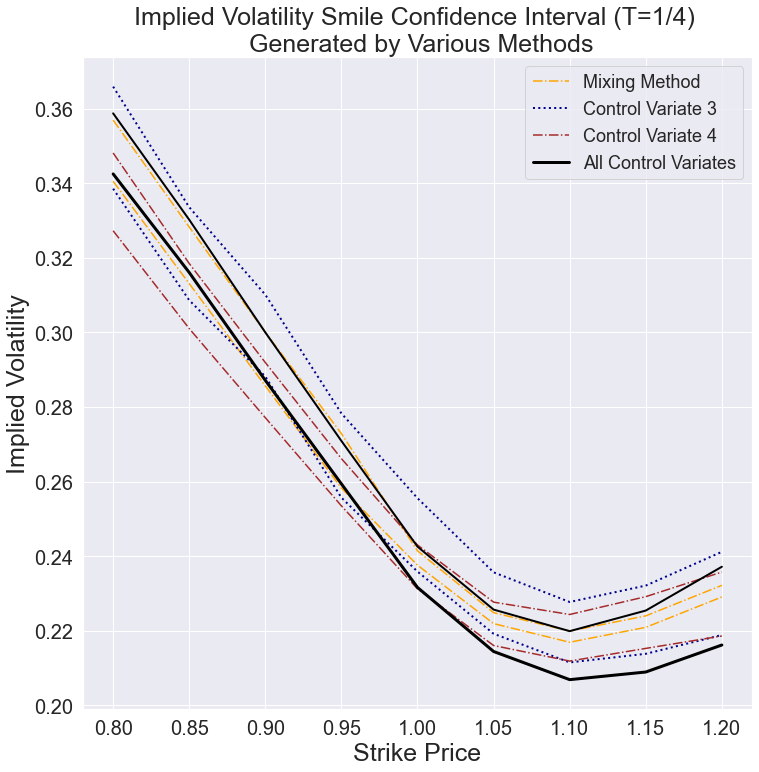

In [144]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower5,label='Control Variate 3',color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_upper5,color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_lower6,label='Control Variate 4',color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_upper6,color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_lower7,label='All Control Variates',color='black',linestyle='-',linewidth=3)
plt.plot(strikes,implied_volatility_upper7,color='black',linestyle='-',linewidth=2)
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1/4) \n Generated by Various Methods')
plt.show()

## T=1/2 Implied Volatility Confidence Interval

In [219]:
# Euler discretization and Milstein discretization
strikes, implied_volatility11, implied_volatility_lower11, implied_volatility_upper11 = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [220]:
# Mixing method and Milstein discretization
strikes, implied_volatility12, implied_volatility_lower12, implied_volatility_upper12 = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [221]:
# option price control variate
strikes, implied_volatility13, implied_volatility_lower13, implied_volatility_upper13 = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [222]:
# the claim paying vs*ds
strikes, implied_volatility14, implied_volatility_lower14, implied_volatility_upper14 = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [223]:
# the claim paying vs**2*ds
strikes, implied_volatility15, implied_volatility_lower15, implied_volatility_upper15 = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [224]:
# the stock
strikes, implied_volatility16, implied_volatility_lower16, implied_volatility_upper16 = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5_000)

In [225]:
# all control variates
strikes, implied_volatility17, implied_volatility_lower17, implied_volatility_upper17 = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1/2, Nsims=5000)

In [226]:
conf_width11=implied_volatility_upper11-implied_volatility_lower11
conf_width12=implied_volatility_upper12-implied_volatility_lower12
conf_width13=implied_volatility_upper13-implied_volatility_lower13
conf_width14=implied_volatility_upper14-implied_volatility_lower14
conf_width15=implied_volatility_upper15-implied_volatility_lower15
conf_width16=implied_volatility_upper16-implied_volatility_lower16
conf_width17=implied_volatility_upper17-implied_volatility_lower17

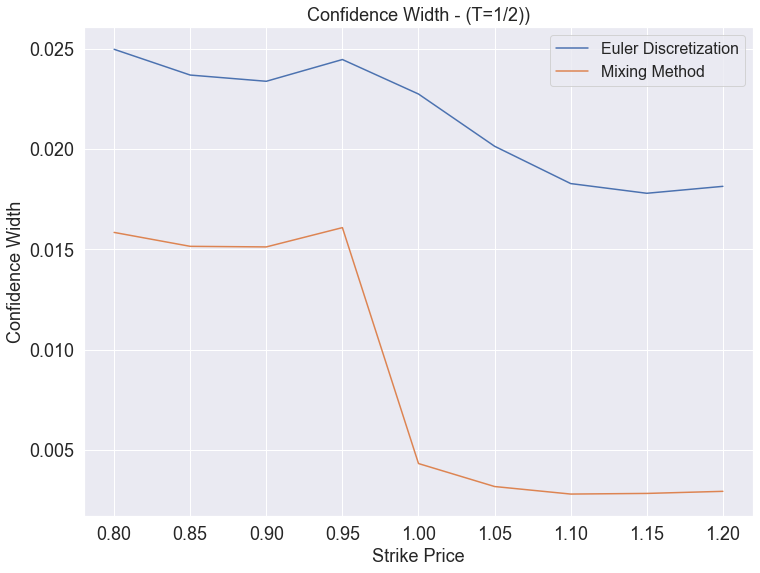

In [270]:
plt.figure(figsize=(12,9))
plt.plot(strikes, conf_width11,label = 'Euler Discretization')
plt.plot(strikes, conf_width12,label = 'Mixing Method')
#plt.plot(strikes, conf_width13,label = 'Option Price')
#plt.plot(strikes, conf_width14,label = r'Paying $\int_{0}^{T} v_s\,ds$')
#plt.plot(strikes, conf_width15,label = r'Paying $\int_{0}^{T} v_s^2\,ds$')
#plt.plot(strikes, conf_width16,label = 'Stock')
#plt.plot(strikes, conf_width17,label = 'All Control Variates')
plt.title('Confidence Width - (T=1/2))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Confidence Width',fontsize=18)
plt.legend(fontsize=16)
plt.show()

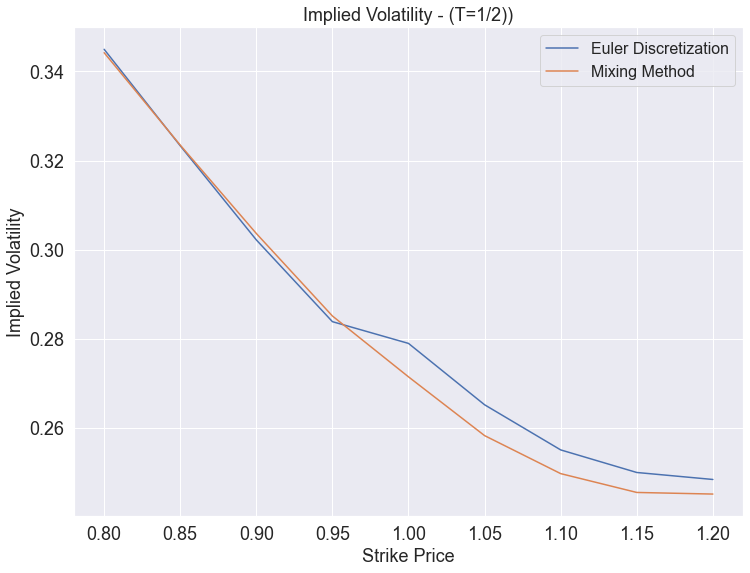

In [271]:
plt.figure(figsize=(12,9))
plt.plot(strikes, implied_volatility11,label = 'Euler Discretization')
plt.plot(strikes, implied_volatility12,label = 'Mixing Method')
#plt.plot(strikes, implied_volatility13,label = 'Option Price')
#plt.plot(strikes, implied_volatility14,label = r'Paying $\int_{0}^{T} v_s\,ds$')
#plt.plot(strikes, implied_volatility15,label = r'Paying $\int_{0}^{T} v_s^2\,ds$')
#plt.plot(strikes, implied_volatility16,label = 'Stock')
#plt.plot(strikes, implied_volatility17,label = 'All Control Variates')
plt.title('Implied Volatility - (T=1/2))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend(fontsize=16)
plt.show()

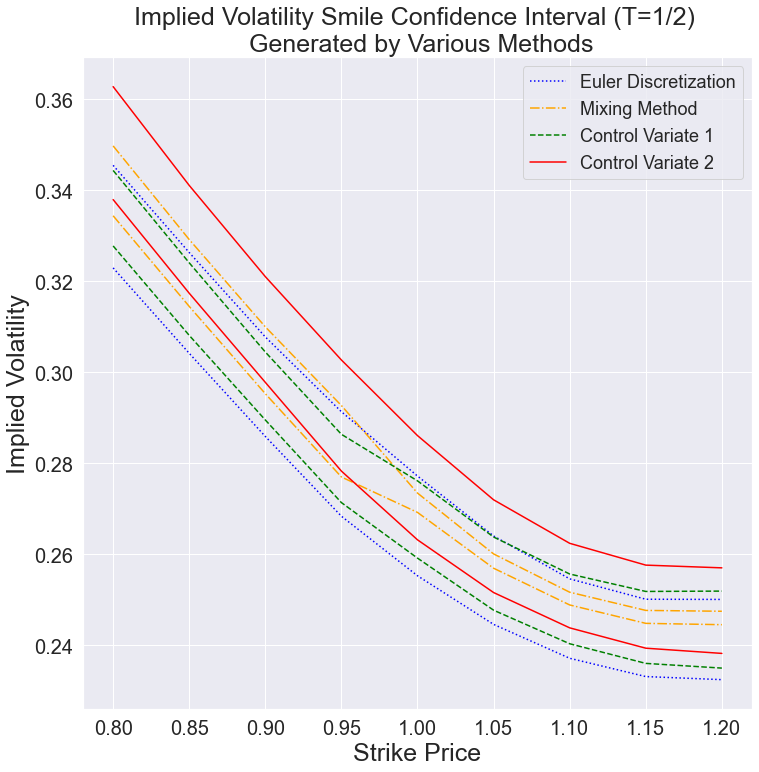

In [152]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower1,label='Euler Discretization',color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_upper1,color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower3,label='Control Variate 1',color='green',linestyle='--')
plt.plot(strikes,implied_volatility_upper3,color='green',linestyle='--')
plt.plot(strikes,implied_volatility_lower4,label='Control Variate 2',color='red',linestyle='-')
plt.plot(strikes,implied_volatility_upper4,color='red',linestyle='-')
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1/2) \n Generated by Various Methods')
plt.show()

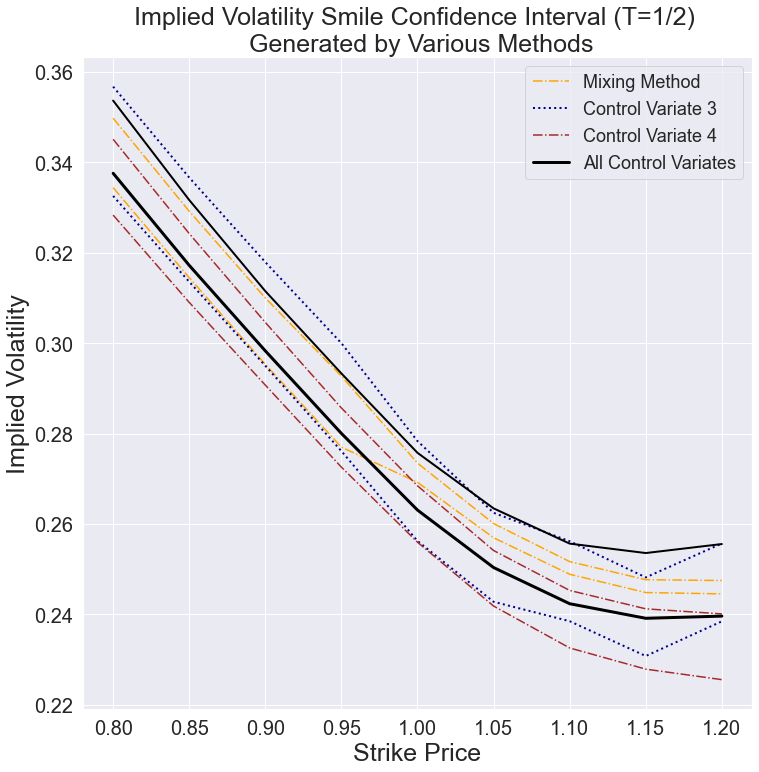

In [153]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower5,label='Control Variate 3',color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_upper5,color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_lower6,label='Control Variate 4',color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_upper6,color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_lower7,label='All Control Variates',color='black',linestyle='-',linewidth=3)
plt.plot(strikes,implied_volatility_upper7,color='black',linestyle='-',linewidth=2)
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1/2) \n Generated by Various Methods')
plt.show()

## T=1 Implied Volatility Confidence Interval

In [230]:
# Euler discretization and Milstein discretization
strikes, implied_volatility21, implied_volatility_lower21, implied_volatility_upper21 = IV_simulation2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [231]:
# Mixing method and Milstein discretization
strikes, implied_volatility22, implied_volatility_lower22, implied_volatility_upper22 = IV_mixing2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [232]:
# option price control variate
strikes, implied_volatility23, implied_volatility_lower23, implied_volatility_upper23 = IV_control_variate1_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [233]:
# the claim paying vs*ds
strikes, implied_volatility24, implied_volatility_lower24, implied_volatility_upper24 = IV_control_variate2_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [234]:
# the claim paying vs**2*ds
strikes, implied_volatility25, implied_volatility_lower25, implied_volatility_upper25 = IV_control_variate3_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [235]:
# the stock
strikes, implied_volatility26, implied_volatility_lower26, implied_volatility_upper26 = IV_control_variate4_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5_000)

In [236]:
# all control variates
strikes, implied_volatility27, implied_volatility_lower27, implied_volatility_upper27 = IV_control_variate_all_conf(S0, v0, rho, kappa, theta, eta, T=1, Nsims=5000)

In [237]:
conf_width21=implied_volatility_upper21-implied_volatility_lower21
conf_width22=implied_volatility_upper22-implied_volatility_lower22
conf_width23=implied_volatility_upper23-implied_volatility_lower23
conf_width24=implied_volatility_upper24-implied_volatility_lower24
conf_width25=implied_volatility_upper25-implied_volatility_lower25
conf_width26=implied_volatility_upper26-implied_volatility_lower26
conf_width27=implied_volatility_upper27-implied_volatility_lower27

In [240]:
print(conf_width21)

[0.02330263 0.02351945 0.0242942  0.02505062 0.02595825 0.02344766
 0.02153297 0.02039068 0.0196727 ]


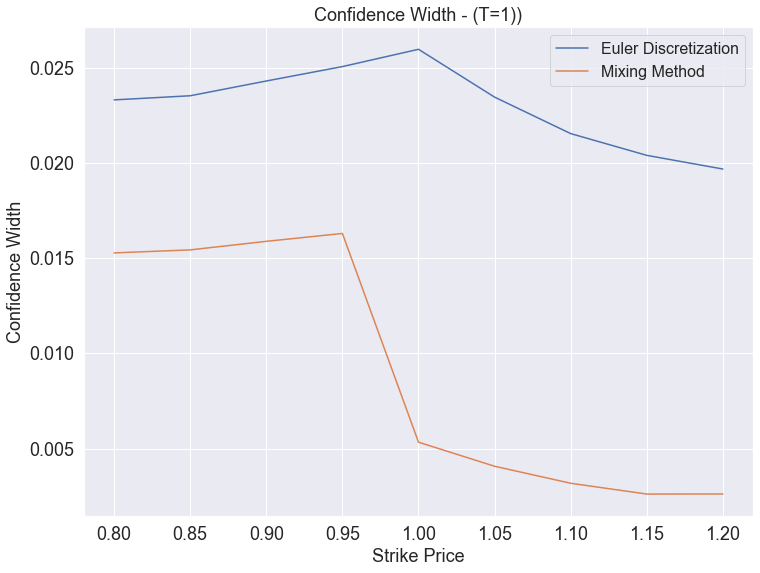

In [272]:
plt.figure(figsize=(12,9))
plt.plot(strikes, conf_width21,label = 'Euler Discretization')
plt.plot(strikes, conf_width22,label = 'Mixing Method')
#plt.plot(strikes, conf_width23,label = 'Option Price')
#plt.plot(strikes, conf_width24,label = r'Paying $\int_{0}^{T} v_s\,ds$')
#plt.plot(strikes, conf_width25,label = r'Paying $\int_{0}^{T} v_s^2\,ds$')
#plt.plot(strikes, conf_width26,label = 'Stock')
#plt.plot(strikes, conf_width27,label = 'All Control Variates')
plt.title('Confidence Width - (T=1))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Confidence Width',fontsize=18)
plt.legend(fontsize=16)
plt.show()

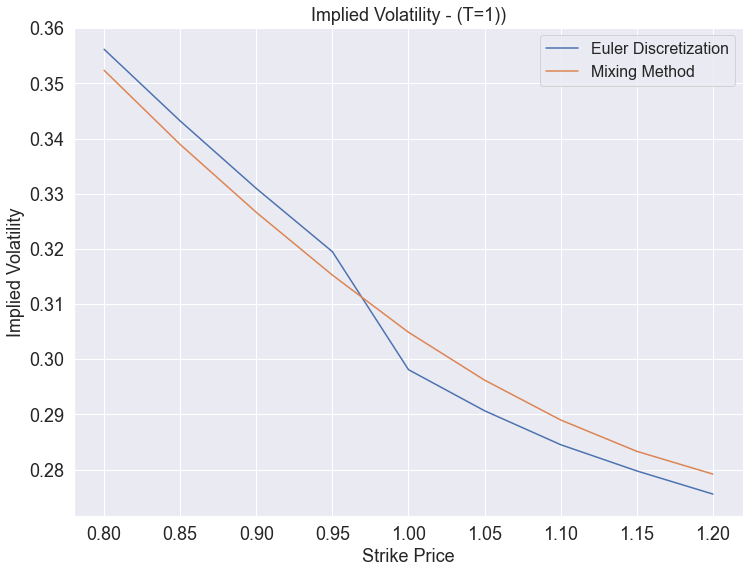

In [273]:
plt.figure(figsize=(12,9))
plt.plot(strikes, implied_volatility21,label = 'Euler Discretization')
plt.plot(strikes, implied_volatility22,label = 'Mixing Method')
#plt.plot(strikes, implied_volatility23,label = 'Option Price')
#plt.plot(strikes, implied_volatility24,label = r'Paying $\int_{0}^{T} v_s\,ds$')
#plt.plot(strikes, implied_volatility25,label = r'Paying $\int_{0}^{T} v_s^2\,ds$')
#plt.plot(strikes, implied_volatility26,label = 'Stock')
#plt.plot(strikes, implied_volatility27,label = 'All Control Variates')
plt.title('Implied Volatility - (T=1))',fontsize=18)
plt.xlabel('Strike Price',fontsize=18)
plt.ylabel('Implied Volatility',fontsize=18)
plt.legend(fontsize=16)
plt.show()

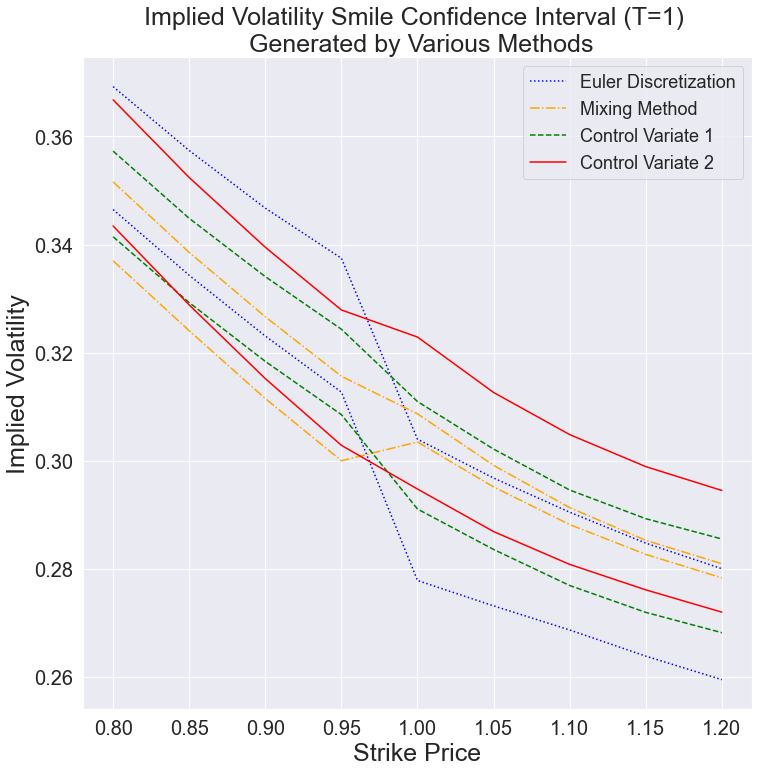

In [161]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower1,label='Euler Discretization',color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_upper1,color='blue',linestyle=':')
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower3,label='Control Variate 1',color='green',linestyle='--')
plt.plot(strikes,implied_volatility_upper3,color='green',linestyle='--')
plt.plot(strikes,implied_volatility_lower4,label='Control Variate 2',color='red',linestyle='-')
plt.plot(strikes,implied_volatility_upper4,color='red',linestyle='-')
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1) \n Generated by Various Methods')
plt.show()

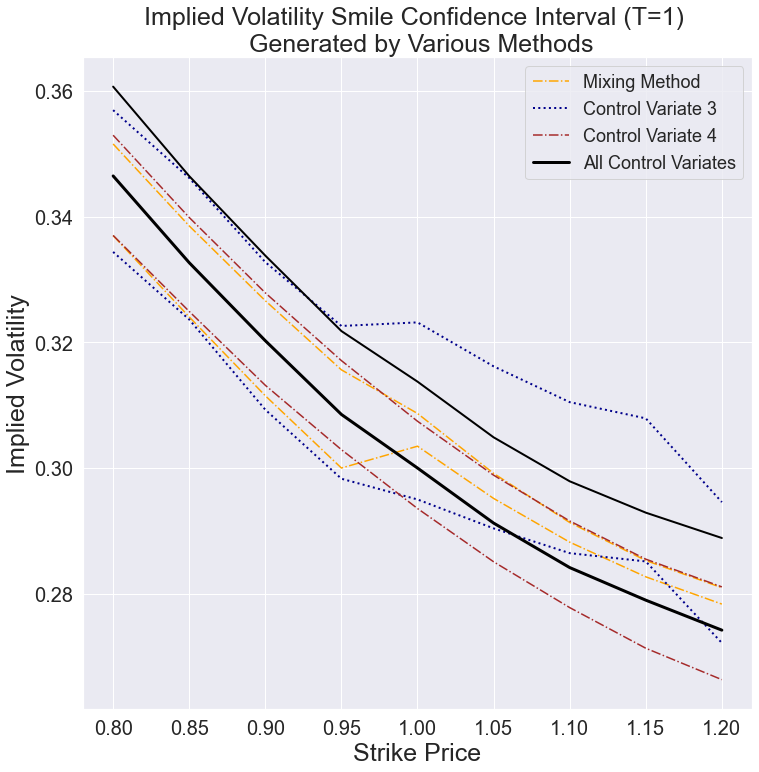

In [162]:
plt.figure(figsize=(12,12))
plt.plot(strikes,implied_volatility_lower2,label='Mixing Method',color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_upper2,color='orange',linestyle='-.')
plt.plot(strikes,implied_volatility_lower5,label='Control Variate 3',color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_upper5,color='darkblue',linestyle=':',linewidth=2)
plt.plot(strikes,implied_volatility_lower6,label='Control Variate 4',color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_upper6,color='brown',linestyle='-.')
plt.plot(strikes,implied_volatility_lower7,label='All Control Variates',color='black',linestyle='-',linewidth=3)
plt.plot(strikes,implied_volatility_upper7,color='black',linestyle='-',linewidth=2)
plt.legend(fontsize=18)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile Confidence Interval (T=1) \n Generated by Various Methods')
plt.show()

In [241]:
# T=1/4
print(conf_width1)# Euler discretization and Milstein discretization
print(conf_width2)# Mixing method and Milstein discretization
print(conf_width3)# option price
print(conf_width4)#vs
print(conf_width5)#vs2
print(conf_width6)#stock
print(conf_width7)#all

[0.02603066 0.02324756 0.02193552 0.02188945 0.01934515 0.01598213
 0.01509798 0.01567225 0.01801576]
[0.01590576 0.01407309 0.01397267 0.01415745 0.00383654 0.00293627
 0.00302315 0.0031015  0.00312558]
[0.02038473 0.01686256 0.01438252 0.01403488 0.01371959 0.01258035
 0.0134364  0.01567582 0.01816201]
[0.02603397 0.02382463 0.02214002 0.02259604 0.0185693  0.01534344
 0.0149301  0.01672073 0.01947824]
[0.02329794 0.02242184 0.02197111 0.02198679 0.01910336 0.01597818
 0.01560637 0.01753856 0.01996932]
[0.02015483 0.01708791 0.01413237 0.01297006 0.01209961 0.01205824
 0.01320669 0.01529266 0.01908721]
[0.01738987 0.01434782 0.01291276 0.01141613 0.01047567 0.01056017
 0.01171002 0.01408461 0.0160671 ]


In [242]:
# T=1/2
print(conf_width11)# Euler
print(conf_width12)# Mixing
print(conf_width13)# option price
print(conf_width14)#vs
print(conf_width15)#vs2
print(conf_width16)#stock
print(conf_width17)#all

[0.02497348 0.02368995 0.02338005 0.02446354 0.02274507 0.02014286
 0.01828272 0.0177993  0.01814493]
[0.01584893 0.01515538 0.01512645 0.0160879  0.00433206 0.00318704
 0.00281153 0.00284333 0.00294764]
[0.01700636 0.01558342 0.01487611 0.01543756 0.01755645 0.01644234
 0.01622092 0.01706286 0.01914388]
[0.0242915  0.02313798 0.02291201 0.02415944 0.02264916 0.02025897
 0.01846459 0.01818836 0.01876321]
[0.02388339 0.02294972 0.02286677 0.02399548 0.02231506 0.01984924
 0.01794033 0.01738825 0.01856921]
[0.01805109 0.01601303 0.01466967 0.01417409 0.01337856 0.01358195
 0.01353914 0.01436882 0.01558386]
[0.01534542 0.01370103 0.01315611 0.01261863 0.01215083 0.01243711
 0.01238202 0.01310661 0.01408153]


In [243]:
# T=1
print(conf_width21)# Euler
print(conf_width22)# Mixing
print(conf_width23)# option price
print(conf_width24)#vs
print(conf_width25)#vs2
print(conf_width26)#stock
print(conf_width27)#all

[0.02330263 0.02351945 0.0242942  0.02505062 0.02595825 0.02344766
 0.02153297 0.02039068 0.0196727 ]
[0.01526963 0.01542867 0.01587728 0.01629065 0.00533287 0.0040702
 0.00317725 0.0026102  0.00261415]
[0.01578919 0.01558648 0.01573813 0.01587068 0.01966299 0.018312
 0.01737968 0.01725499 0.01712322]
[0.02276801 0.0227168  0.02366209 0.02446382 0.02626617 0.02377166
 0.02192248 0.02081995 0.02015344]
[0.02296425 0.02319596 0.02393567 0.02469742 0.02623898 0.02373171
 0.02178356 0.02068206 0.01979399]
[0.01628877 0.01553363 0.01503124 0.01440894 0.01399794 0.0138
 0.01373597 0.01370024 0.0142554 ]
[0.01423859 0.0137869  0.01355507 0.01324473 0.01361559 0.01359618
 0.01374251 0.01404307 0.01512133]


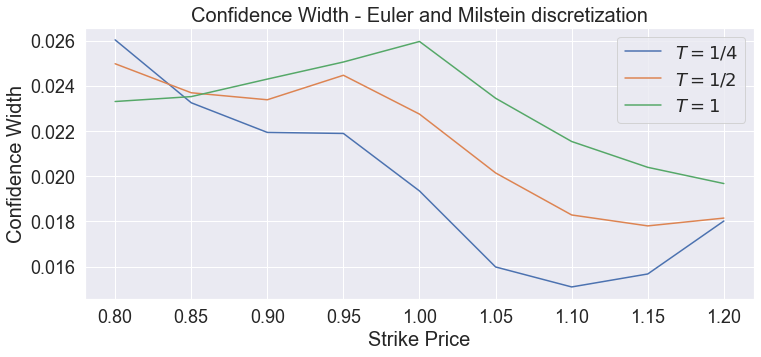

In [251]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width1,label = r"$T=1/4$")
plt.plot(strikes, conf_width11,label = r"$T=1/2$")
plt.plot(strikes, conf_width21,label = r"$T=1$")
plt.title('Confidence Width - Euler and Milstein discretization',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

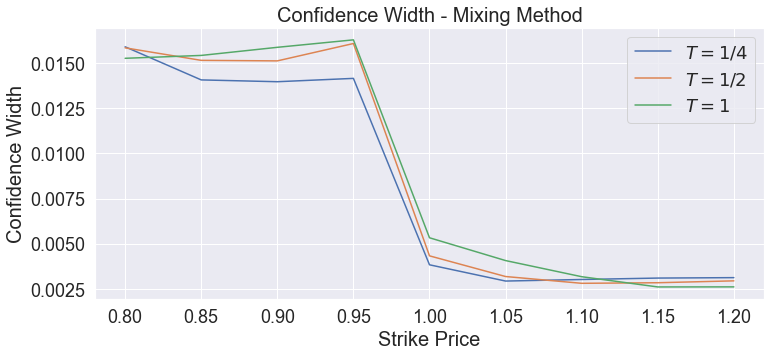

In [252]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width2,label = r"$T=1/4$")
plt.plot(strikes, conf_width12,label = r"$T=1/2$")
plt.plot(strikes, conf_width22,label = r"$T=1$")
plt.title('Confidence Width - Mixing Method',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

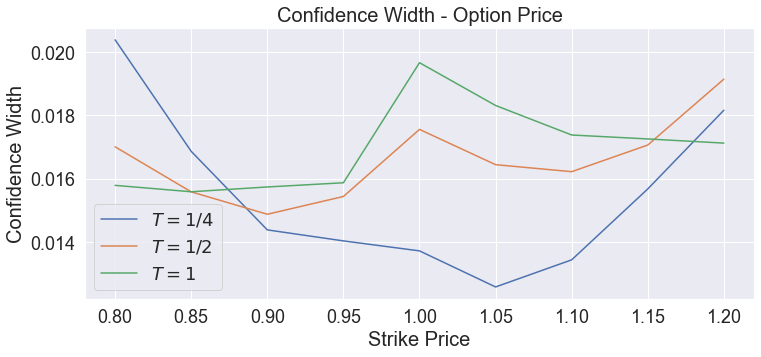

In [253]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width3,label = r"$T=1/4$")
plt.plot(strikes, conf_width13,label = r"$T=1/2$")
plt.plot(strikes, conf_width23,label = r"$T=1$")
plt.title('Confidence Width - Option Price',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

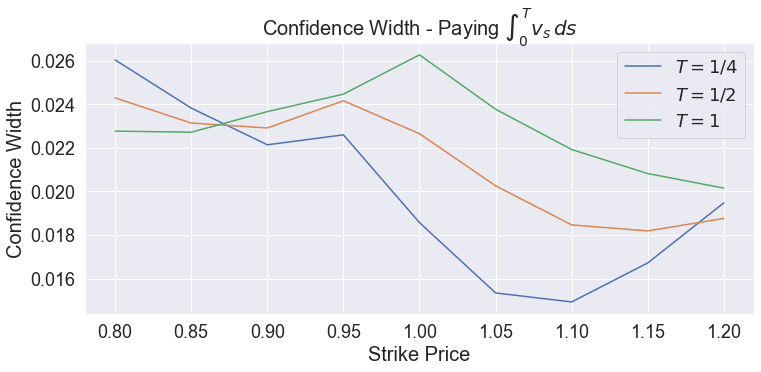

In [258]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width4,label = r"$T=1/4$")
plt.plot(strikes, conf_width14,label = r"$T=1/2$")
plt.plot(strikes, conf_width24,label = r"$T=1$")
plt.title(r'Confidence Width - Paying $\int_{0}^{T} v_s\,ds$',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

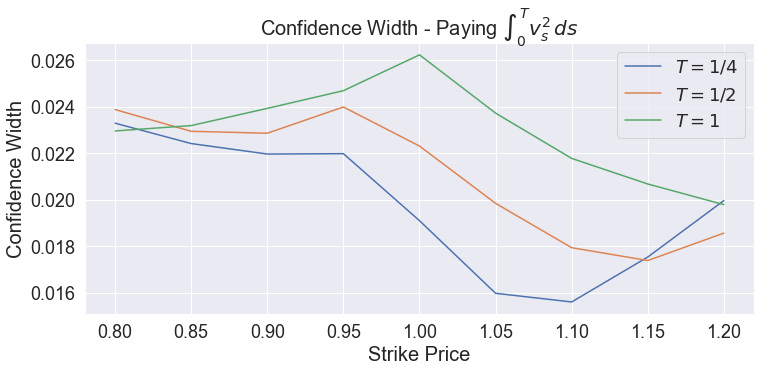

In [255]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width5,label = r"$T=1/4$")
plt.plot(strikes, conf_width15,label = r"$T=1/2$")
plt.plot(strikes, conf_width25,label = r"$T=1$")
plt.title(r'Confidence Width - Paying $\int_{0}^{T} v_s^2\,ds$',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

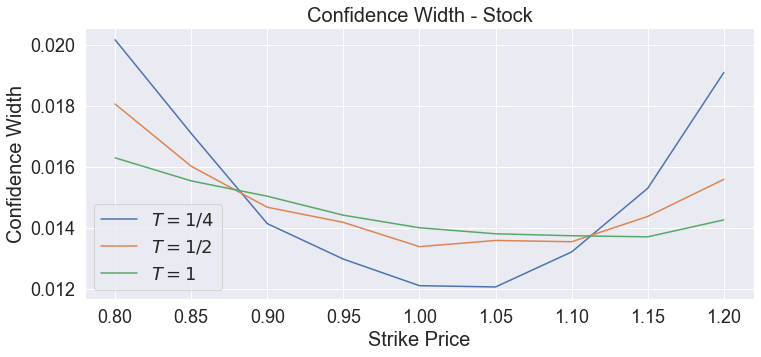

In [256]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width6,label = r"$T=1/4$")
plt.plot(strikes, conf_width16,label = r"$T=1/2$")
plt.plot(strikes, conf_width26,label = r"$T=1$")
plt.title('Confidence Width - Stock',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()

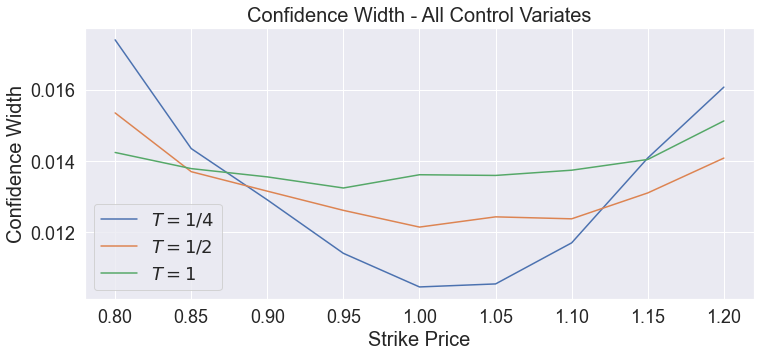

In [257]:
plt.figure(figsize=(12,5))
plt.plot(strikes, conf_width7,label = r"$T=1/4$")
plt.plot(strikes, conf_width17,label = r"$T=1/2$")
plt.plot(strikes, conf_width27,label = r"$T=1$")
plt.title('Confidence Width - All Control Variates',fontsize=20)
plt.xlabel('Strike Price',fontsize=20)
plt.ylabel('Confidence Width',fontsize=20)
plt.legend()
plt.show()